<a href="https://colab.research.google.com/github/anand-w-dcu54/lifestyle_diabeties/blob/work%2Fanand/BRFSS_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start up notebook for behavioural risk factors

In [ ]:
!pip install -U -q PyDrive2

from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.3 MB/s eta 0:00:00


In [ ]:
!pip install seaborn --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [ ]:
import seaborn as sns
print(sns.__version__)

0.13.2


In [ ]:
#Import the required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#from ydata_profiling import ProfileReport
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix,roc_curve, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

# **Import the first preprocessed dataset from Kaggle**

In [ ]:

#Load dataset - diabetes _ 012 _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015.
#The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes.
#There is class imbalance in this dataset. This dataset has 21 feature variables

#File path https://drive.google.com/file/d/1V7brEY8oKth3fK6thmf3HtL1SduS2bVH/view?usp=drive_link

file_diabeties012 = drive.CreateFile({'id':'1V7brEY8oKth3fK6thmf3HtL1SduS2bVH'})
file_diabeties012.GetContentFile('brfss_diabeties.csv')
dataset_diabeties012 = pd.read_csv('brfss_diabeties.csv')

#Make the target variable(diabetes binary)
#So far 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes

#merge categories 1 & 2 --> Yes diabetes
#rationale : being told by a doctor you are prediabetic is an indication of diabetes risk and ultimately we are interested in risk

In [ ]:
new_df = dataset_diabeties012
rows_with_index2 = new_df[new_df['Diabetes_012'] == 2].index
new_df.loc[rows_with_index2, ['Diabetes_012']] = 1


In [ ]:
new_df = new_df.rename(columns={"Diabetes_012": "Diabetes_binary"})

# Check the target variable distribution

<ipython-input-8-d52c9ff384a6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_012', data=dataset_diabeties012, palette='hls')


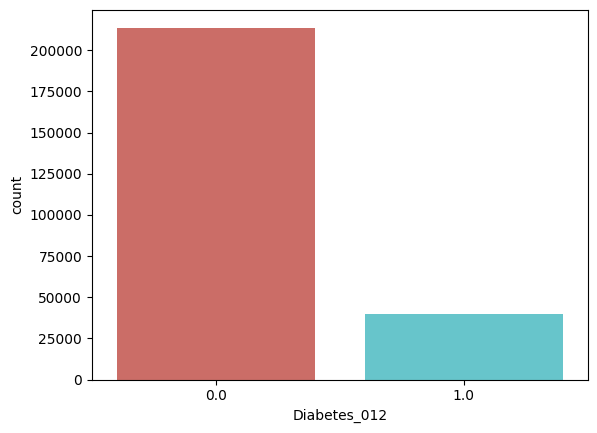

In [ ]:
sns.countplot(x='Diabetes_012', data=dataset_diabeties012, palette='hls')
plt.show()

There is a clear imbalance with class0 (No Diabetes) dominating the distribution among the 3 classes

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# define a function to simplify the plots in further sections
def ida_plot(df, li_col, row, col=3, figsize=(25, 8), legend=True):

    """
    This function return plt subplots by
    looping through the df columns
    display only the desired columns
    """

    # prepare subplot format
    fig, ax = plt.subplots(row, col, figsize=figsize)
    axe = ax.ravel()

    # use for loop to plot
    for i in range(len(li_col)):
        # create bar charts for each column
        sns.countplot(x=df[li_col[i]], ax=axe[i], palette="Set2", edgecolor="black", hue=df[li_col[i]], legend=legend)
        #sns.countplot(x=df[li_col[i]], ax=axe[i], palette="Set2", edgecolor="black")

    # adjust the spacing of the subplots
    plt.subplots_adjust(
        wspace=0.5,
        hspace=0.5
    )

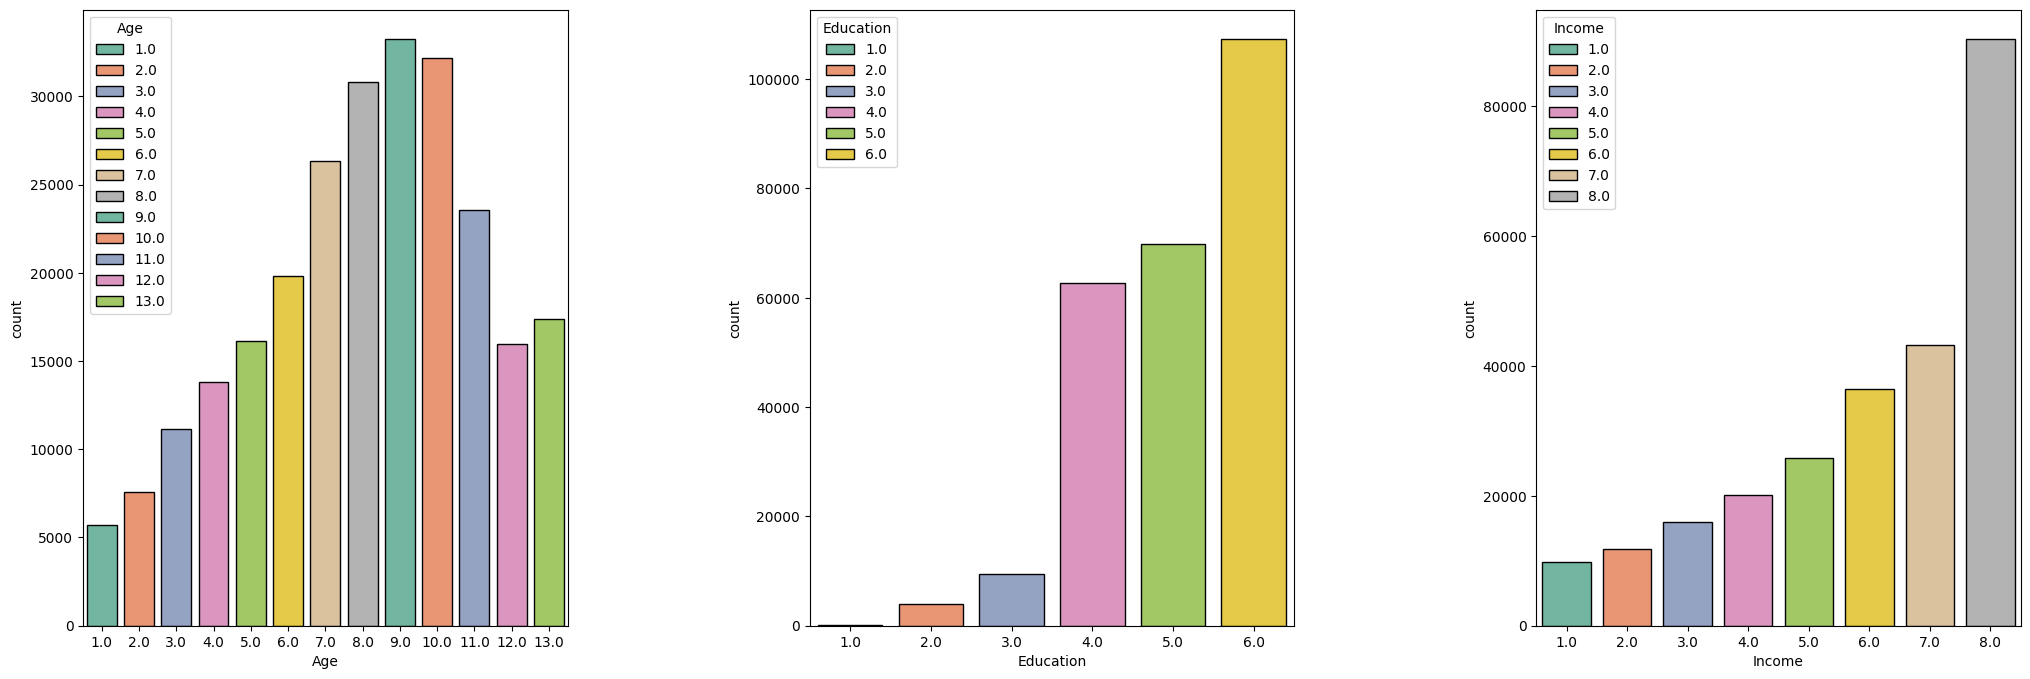

In [ ]:
ida_plot(df=dataset_diabeties012, li_col=['Age', 'Education', 'Income'], row=1, col=3, figsize=(25, 8))

Observations:

1. Majority of the respondents are in:

*   middle aged
*   high education category
*   high income


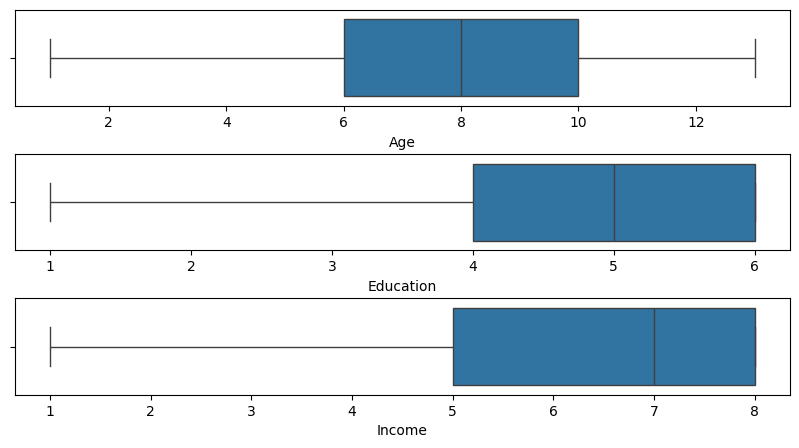

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 5))


for i,col in enumerate(['Age','Education', 'Income']):
  #plt.subplot(4,2,i+1)
  sns.boxplot(x=col, data=dataset_diabeties012, ax=ax[i])
  plt.subplots_adjust(
        wspace=0.5,
        hspace=0.5
  )
plt.show()

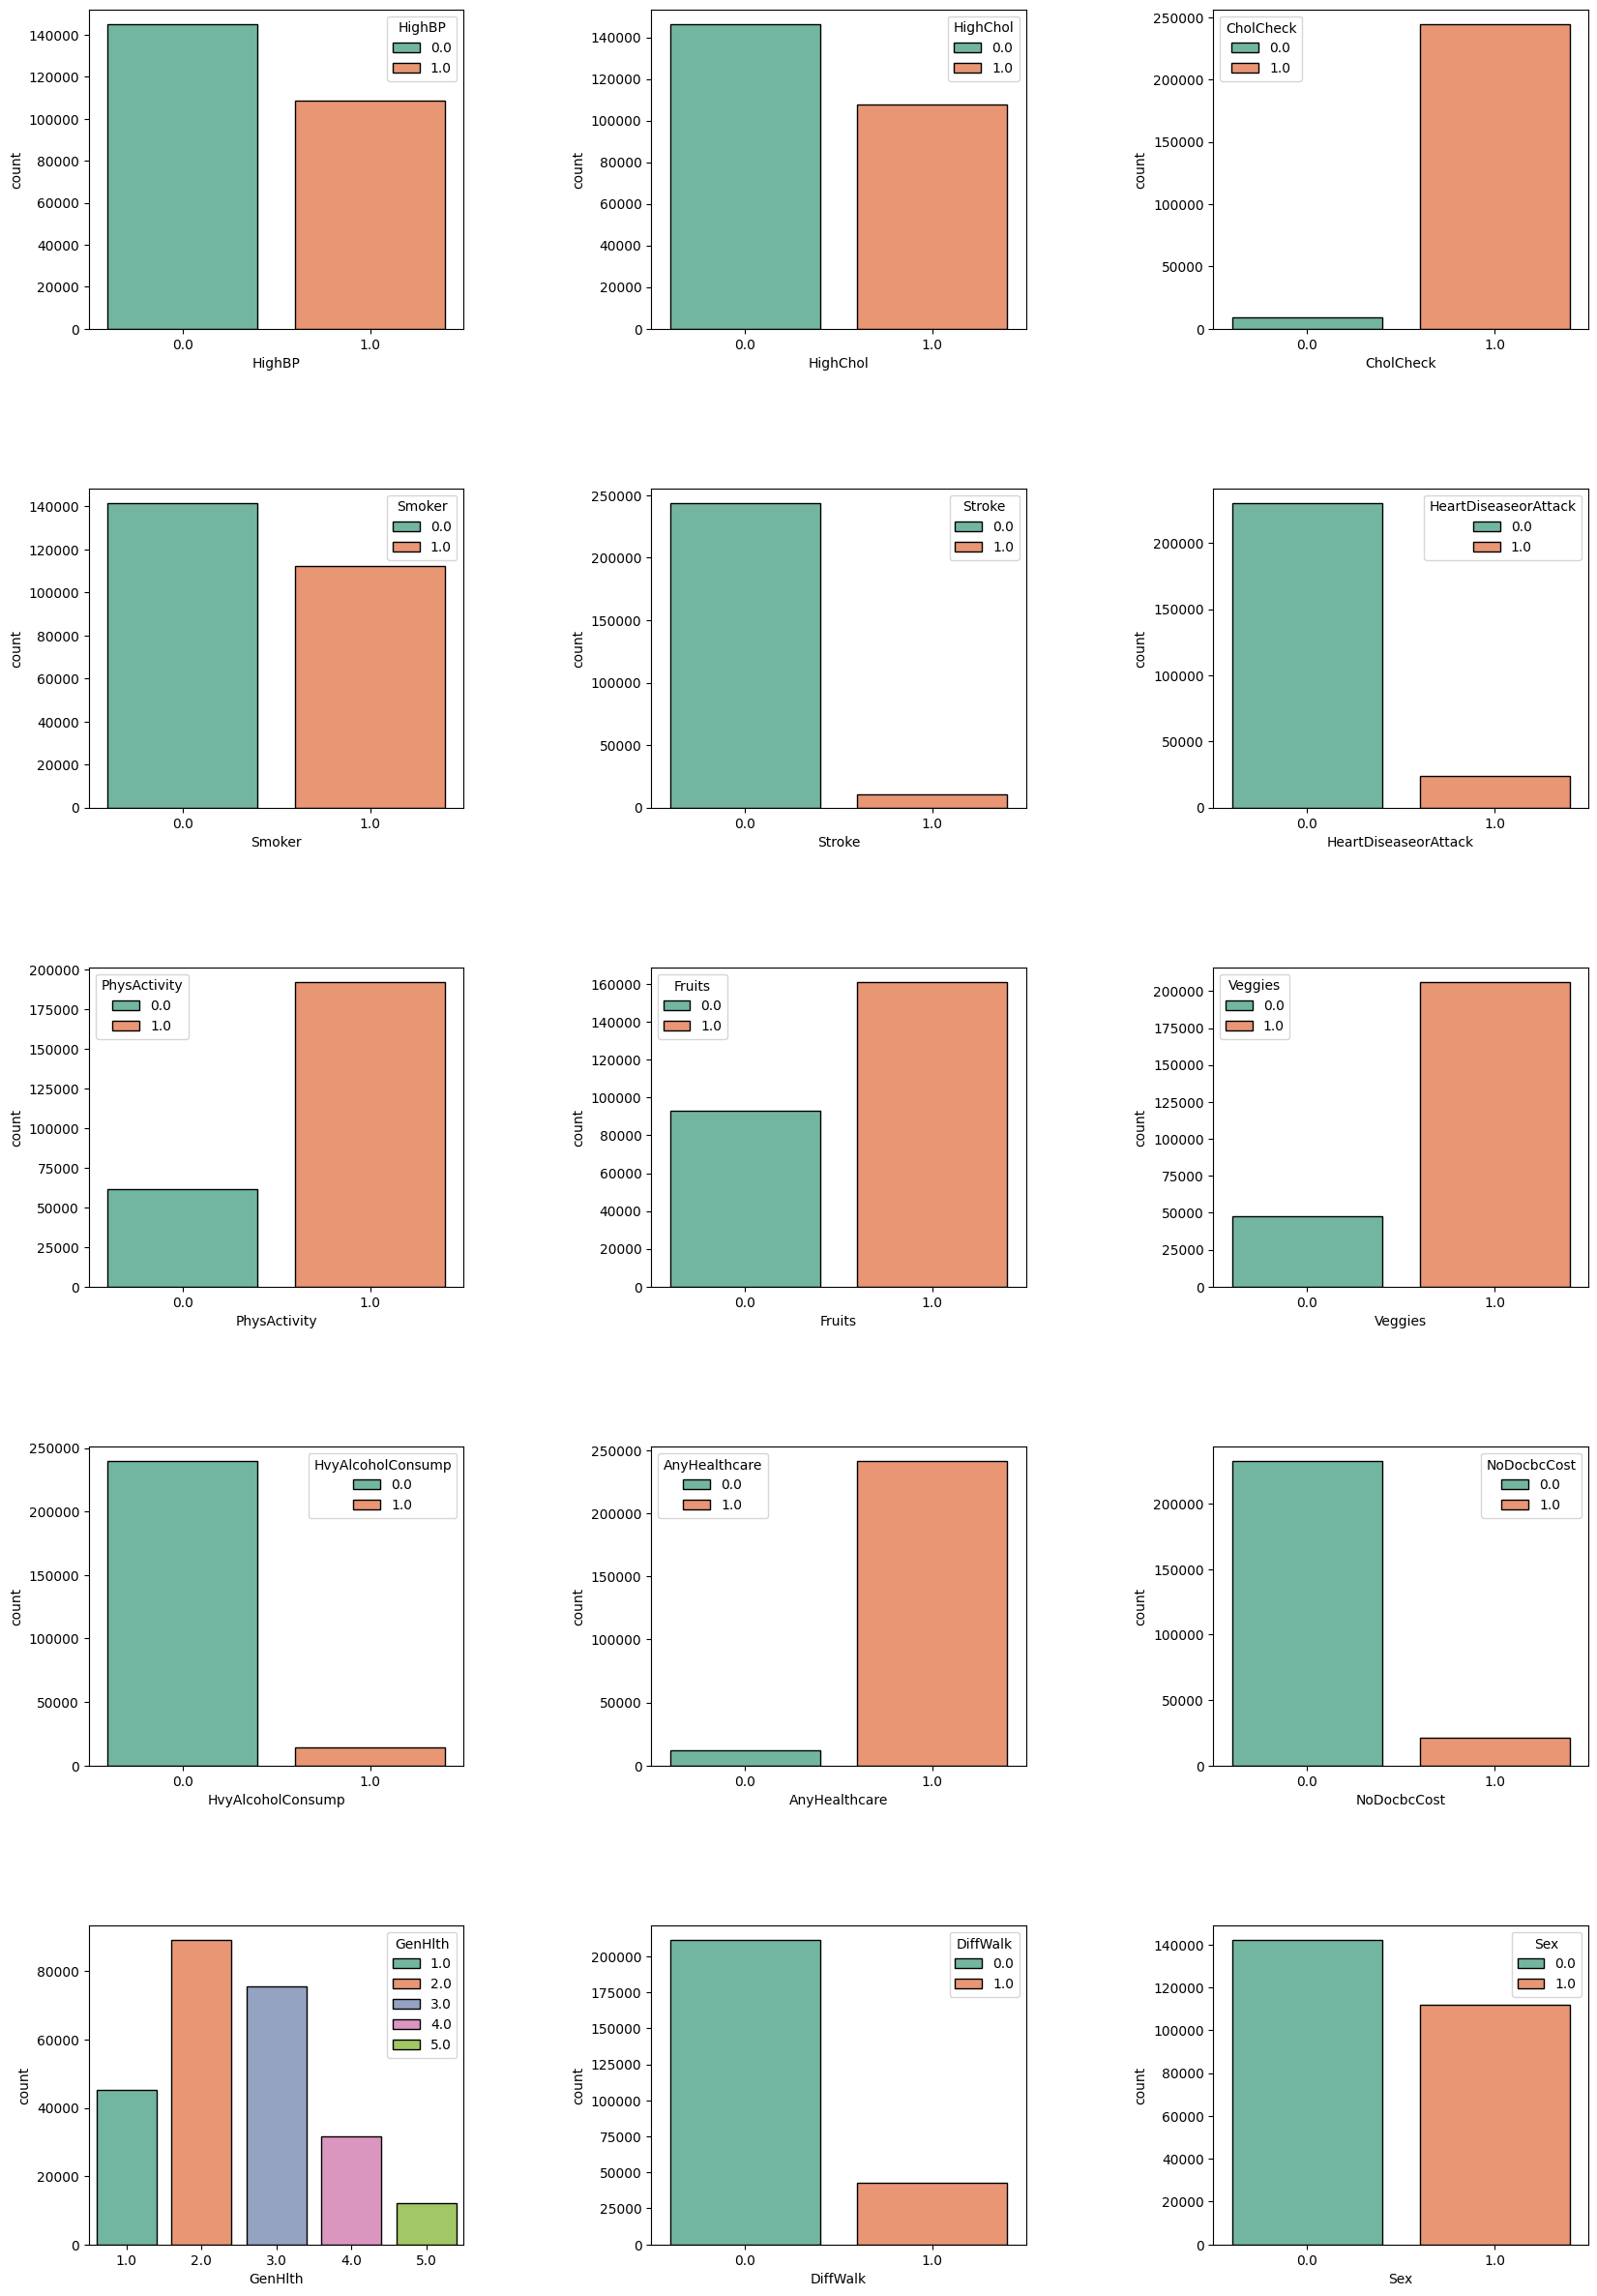

In [ ]:
cols = [x for x in dataset_diabeties012.columns if x not in ["Diabetes_012", "Age", "Education", "Income", "BMI", "MentHlth", "PhysHlth"]]
ida_plot(dataset_diabeties012, cols, int(len(cols)/3+0.5), figsize=(20, 30))

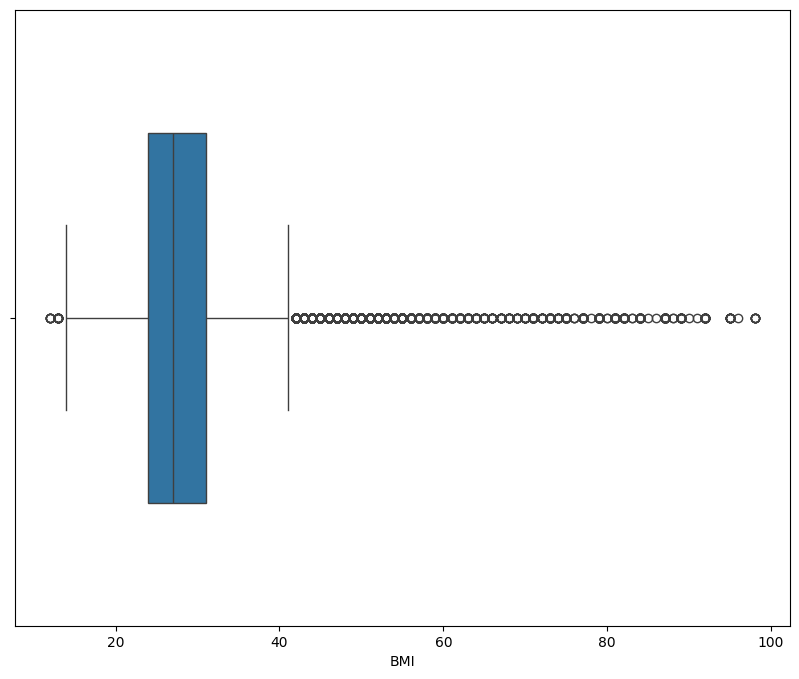

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.boxplot(x="BMI", data=dataset_diabeties012, ax=ax, width=.6)
#ax.xaxis.set_tics()
plt.show()

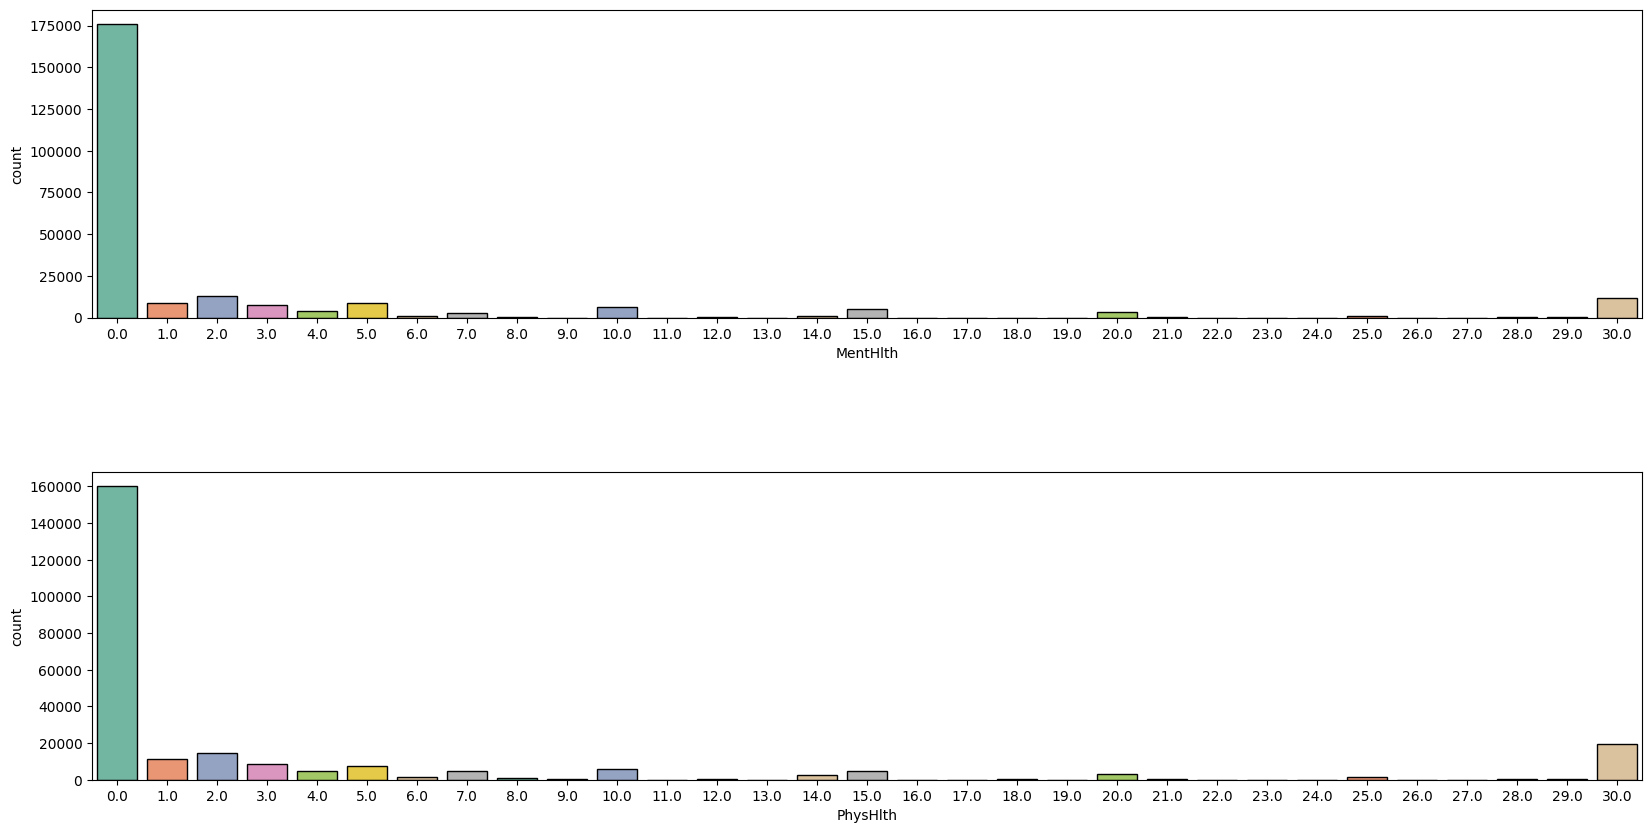

In [ ]:
ida_plot(df=dataset_diabeties012, li_col=['MentHlth', 'PhysHlth'], row=2, col=1, legend=False, figsize=(20,10))

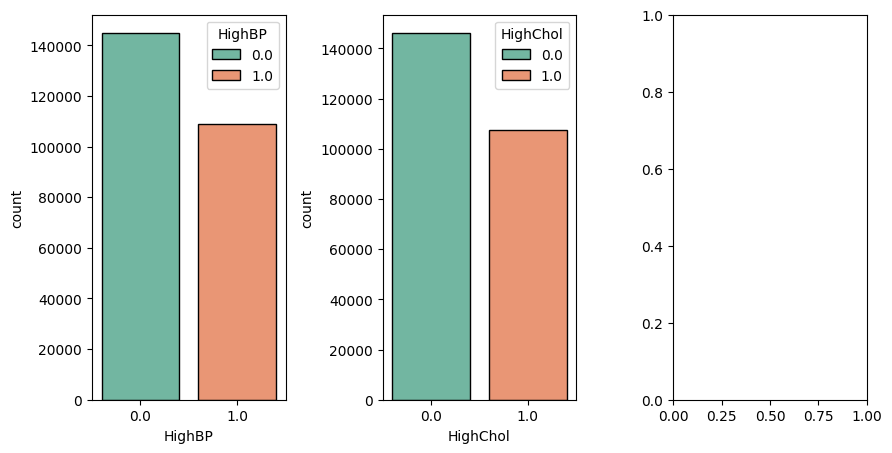

In [ ]:
cols = [x for x in new_df.columns if x  in ["HighBP", "HighChol"]]
ida_plot(new_df, cols, int(len(cols)/3+0.5), figsize=(10, 5))

In [ ]:
#Check proprtions of HighBP and HighCol positve and negetive respondents
highbp_proportion = len(new_df[new_df['HighBP'] == 0]) / len(new_df[new_df['HighBP'] == 1])
highchol_proportion = len(new_df[new_df['HighChol'] == 0]) / len(new_df[new_df['HighChol'] == 1])
print(f"highbp_proportion : {highbp_proportion}       highchol_proportion : {highchol_proportion}  ")

highbp_proportion : 1.3309963336978194       highchol_proportion : 1.3578180331068583  


In [ ]:
#Downsampling : make the dataset balanced in a 50-50 split of non-diabetics to diabetics and prediabetics.
# There are a sufficient number of records to do this randomly and yield predictive results.
# There are 4631 (pre-diabetes) + 35346 (diabetes) so we can make a new 50-50 binary dataset of 39,977 diabetic risk individuals to 39,977 randomly selected non-diabetics.
import random
class1_num = len(new_df[new_df['Diabetes_binary'] ==1])
# Sampling and create new dataframe to contain the two balanced classes
loop_condition = True
iterations = 0;
seed = 12
while(loop_condition==True and iterations < 5):


  #Pick the No diabeties samples such that we maintain the proportion of HighBP and HighCol same as the original dataset
  #Pure random selection results in the final combined dataset where we have respondents with highBP=1 > highBP=0 and likewise for highchol
  #/2 gives us roughly the same proportion in both the features
  samples_to_pick_nobp_nochol = int(class1_num/2)

  sample_0_0  = new_df.loc[(new_df['Diabetes_binary']==0) & (new_df['HighBP']==0) & (new_df['HighChol'] == 0)].sample(samples_to_pick_nobp_nochol, random_state=seed)
  sample_0_1 =  new_df.loc[new_df['Diabetes_binary']==0].sample((class1_num - samples_to_pick_nobp_nochol), random_state=seed)
  sample_0 = pd.concat([sample_0_0, sample_0_1])

  sample_1 = new_df[new_df['Diabetes_binary']==1]
  balanced_df = pd.concat([sample_0, sample_1], axis=0)
  highbp_class0 = len(balanced_df[balanced_df['HighBP'] == 0])
  highbp_class1 = len(balanced_df[balanced_df['HighBP'] == 1])
  #print(f"{iterations} 0 : {highbp_class0} 1 : {highbp_class1}")

  highchol_class0 = len(balanced_df[balanced_df['HighChol'] == 0])
  highchol_class1 = len(balanced_df[balanced_df['HighChol'] == 1])
  #print(f"{iterations} 0 : {highchol_class0} 1 : {highchol_class1}")

  if((highbp_class1 < highbp_class0)  & (highchol_class1 < highchol_class0) ):
    loop_condition = False
    print("Making loop condition False")
  else:
    seed = random.randint(0, 99)

  iterations = iterations+1


Making loop condition False


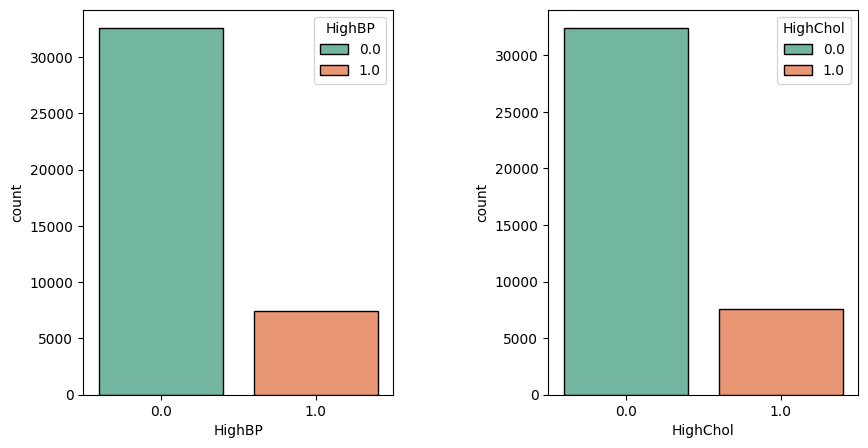

In [ ]:
cols = [x for x in sample_0.columns if x  in ["HighBP", "HighChol"]]
ida_plot(sample_0, li_col=cols, row=1, col=2, figsize=(10, 5))

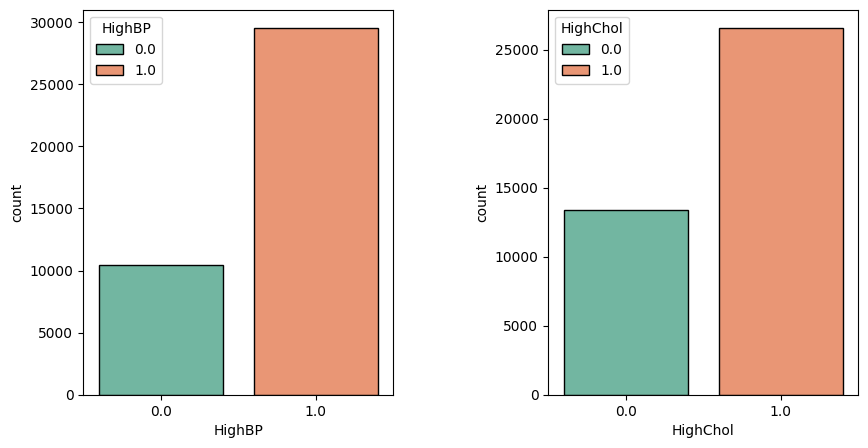

In [ ]:
cols = [x for x in sample_1.columns if x  in ["HighBP", "HighChol"]]
ida_plot(sample_1, li_col=cols, row=1, col=2, figsize=(10, 5))

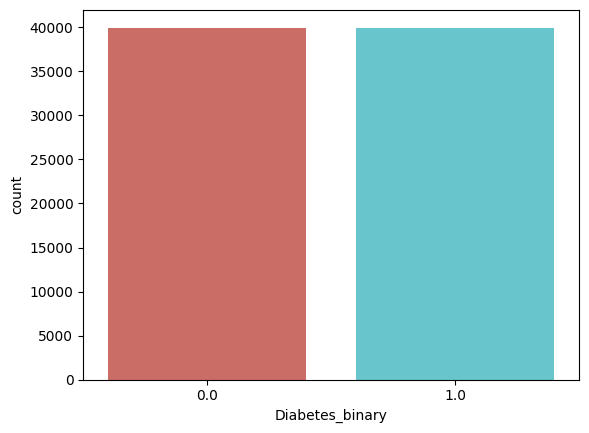

In [ ]:
sns.countplot(x='Diabetes_binary', data=balanced_df, palette='hls')
plt.show()

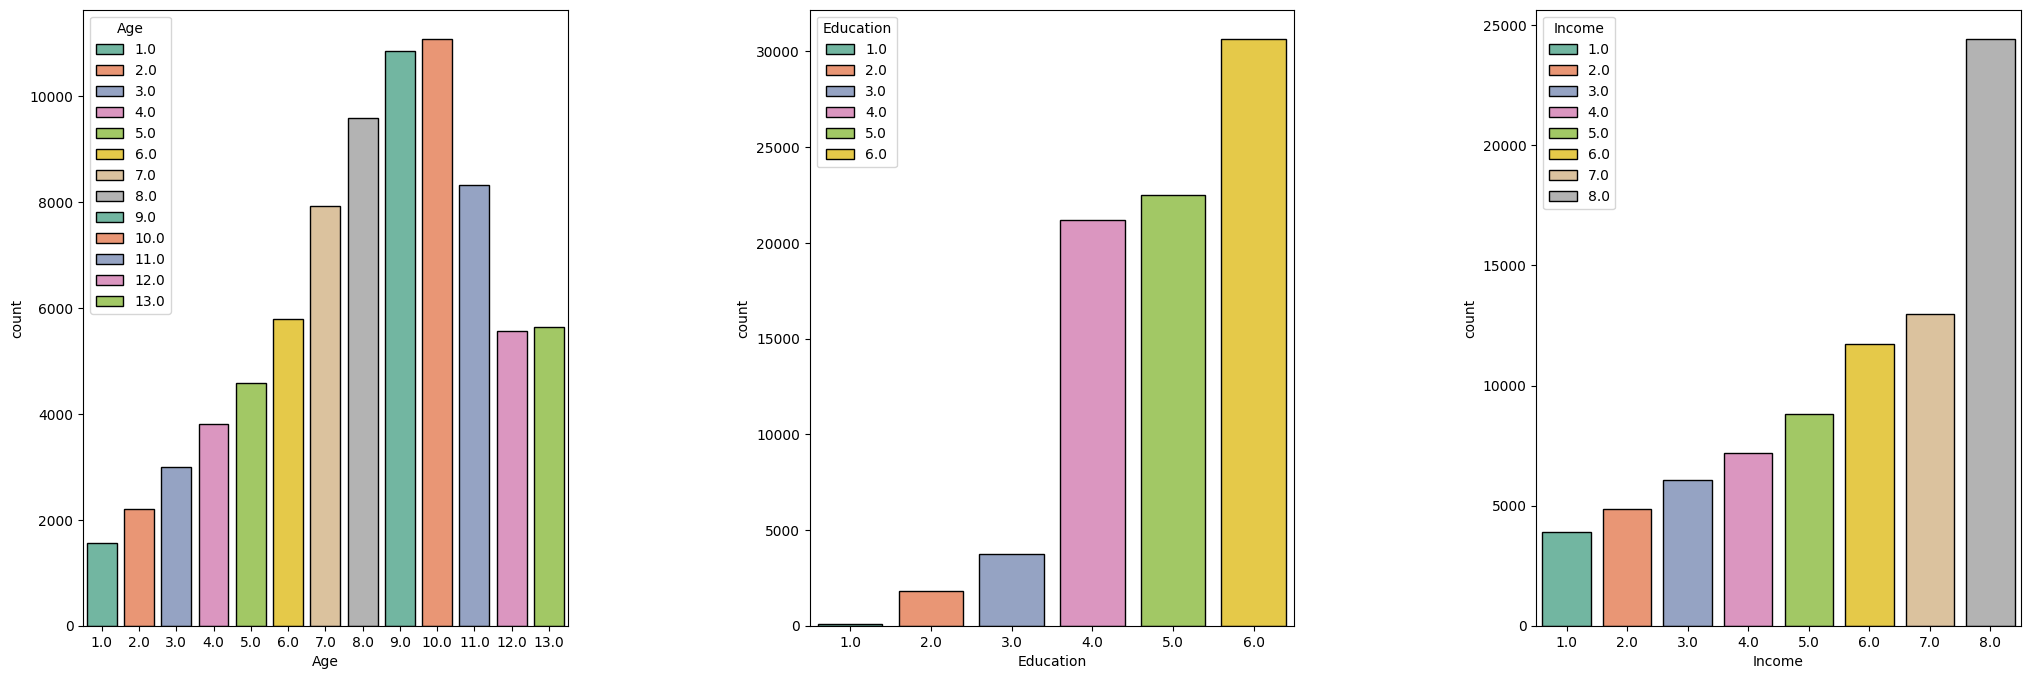

In [ ]:
ida_plot(balanced_df, ['Age', 'Education', 'Income'], 1, 3)

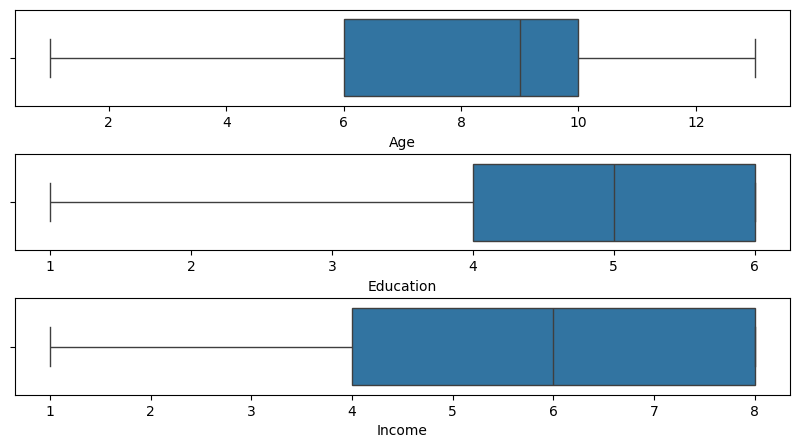

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 5))


for i,col in enumerate(['Age','Education', 'Income']):
  #plt.subplot(4,2,i+1)
  sns.boxplot(x=col, data=balanced_df, ax=ax[i])
  plt.subplots_adjust(
        wspace=0.5,
        hspace=0.5
  )
plt.show()

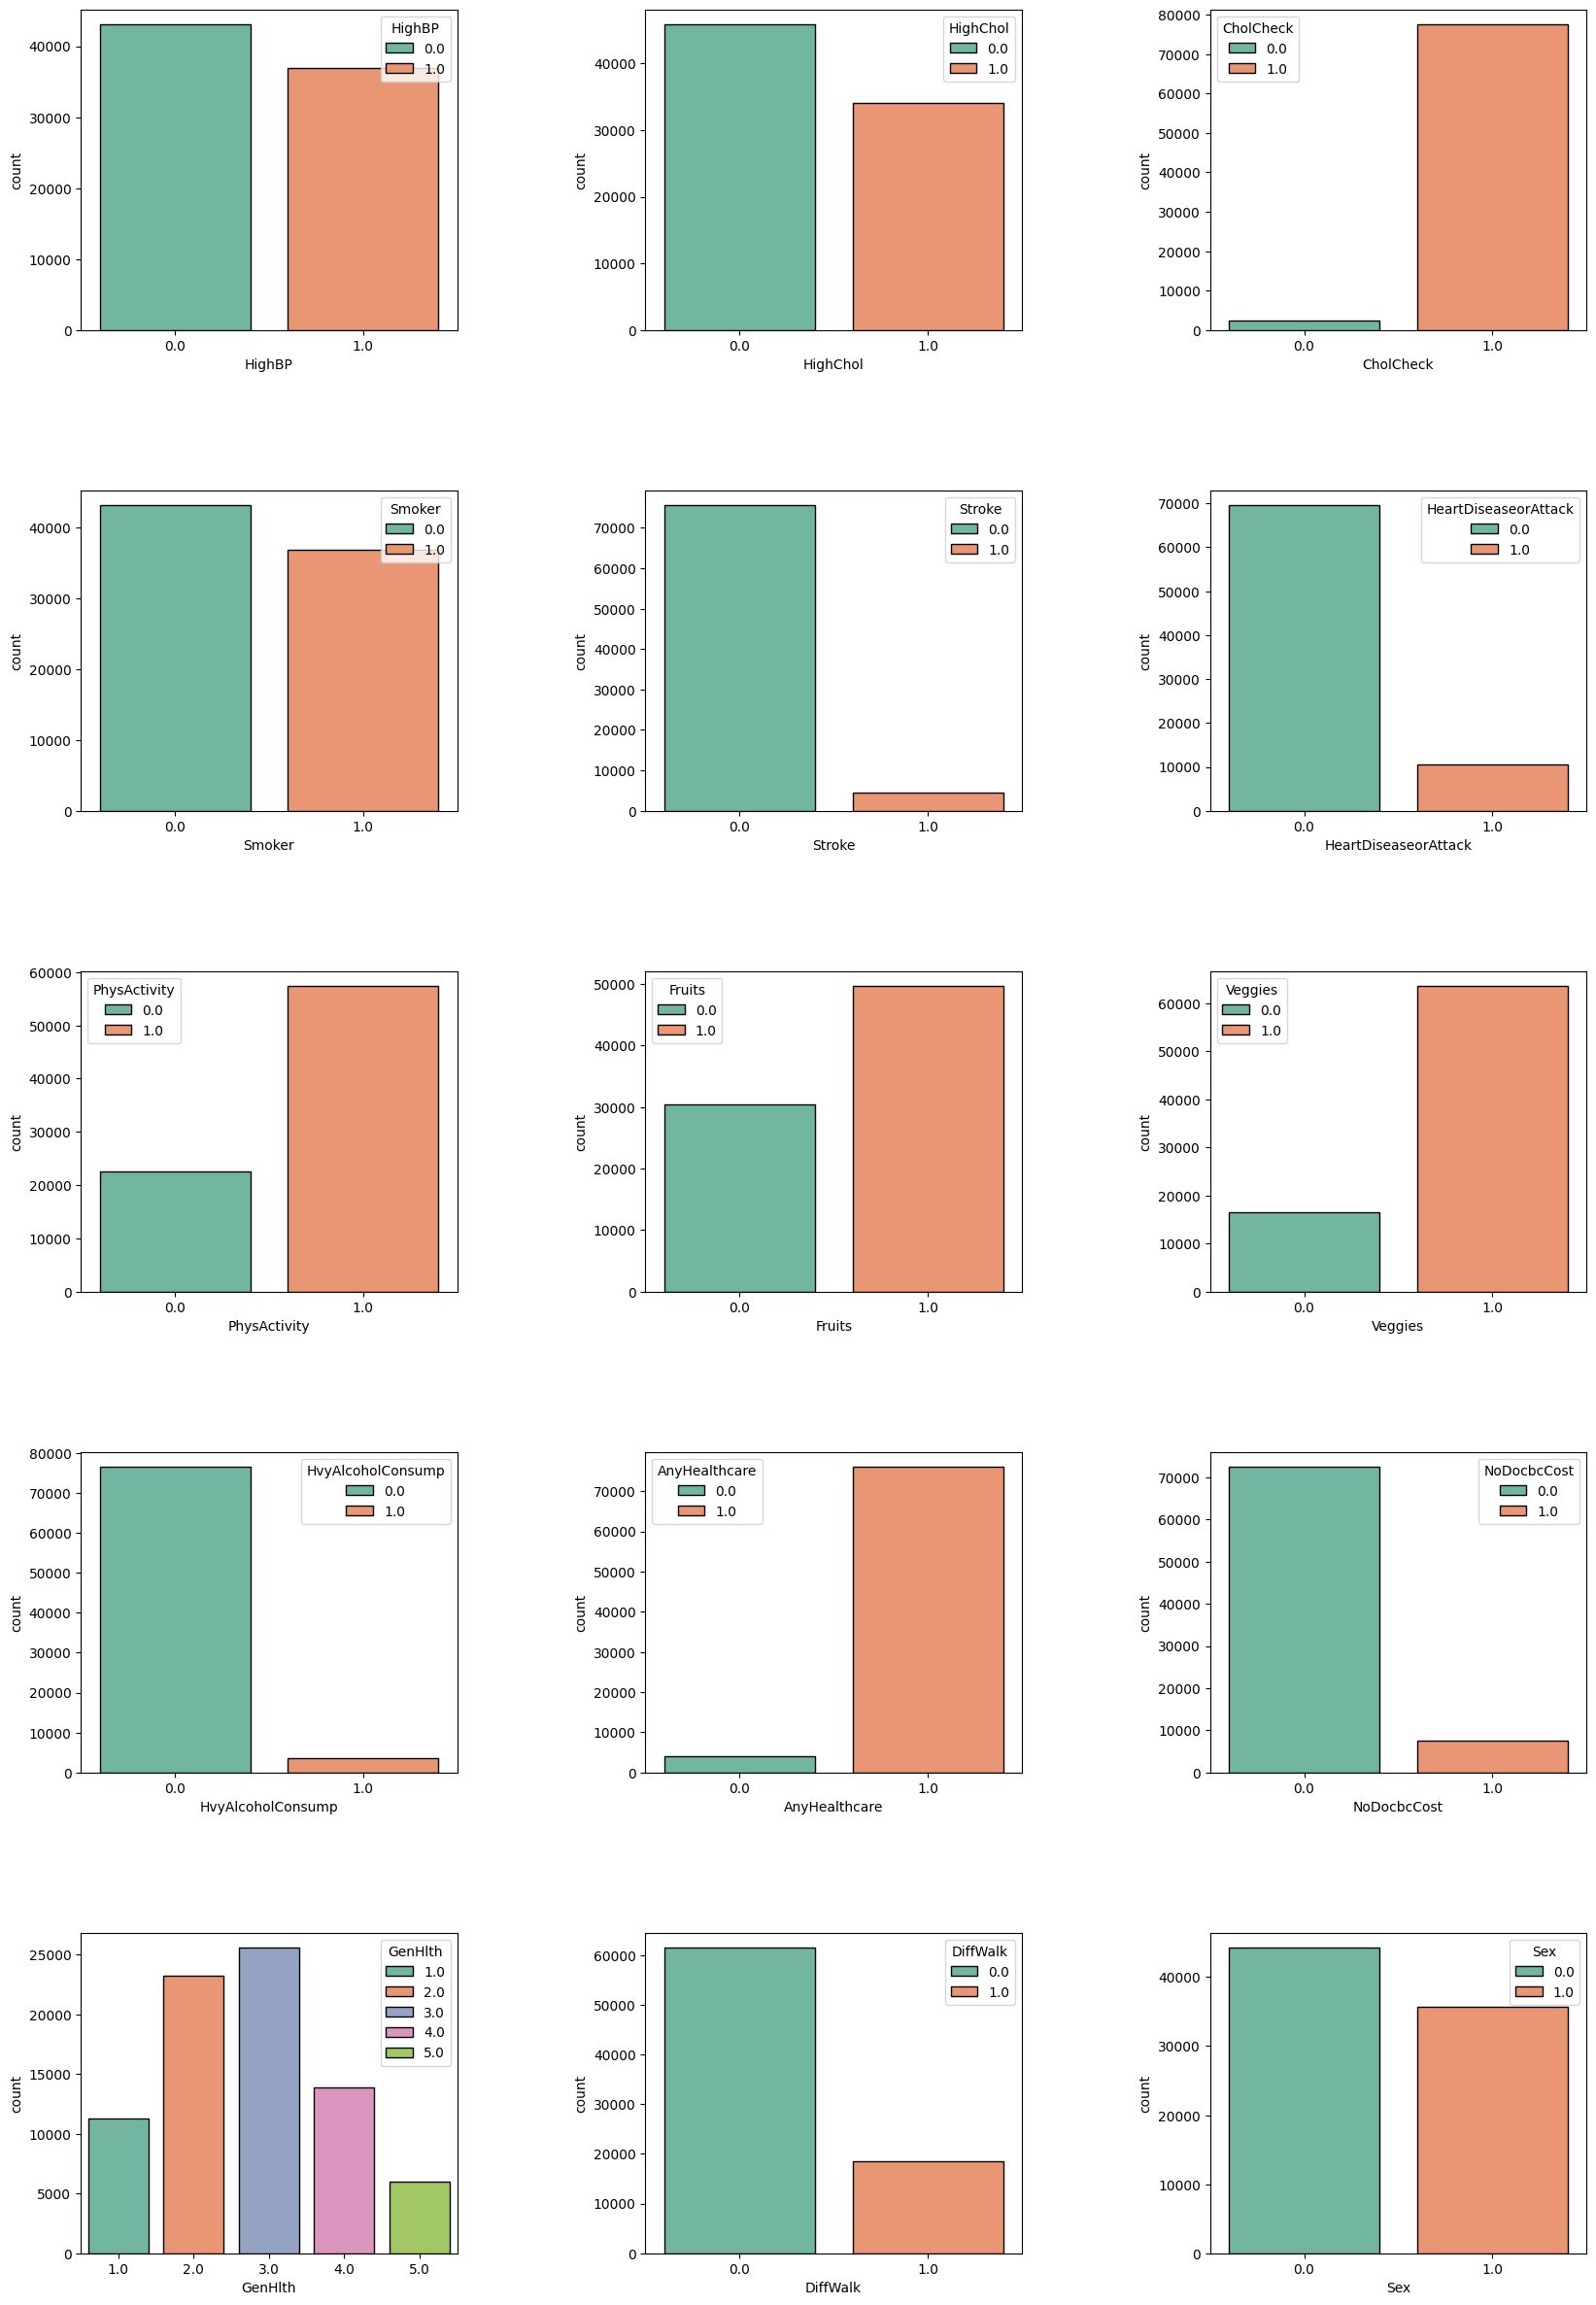

In [ ]:
cols = [x for x in balanced_df.columns if x not in ["Diabetes_binary", "Age", "Education", "Income", "BMI", "MentHlth", "PhysHlth"]]
ida_plot(balanced_df, cols, int(len(cols)/3+0.5), figsize=(20, 30))

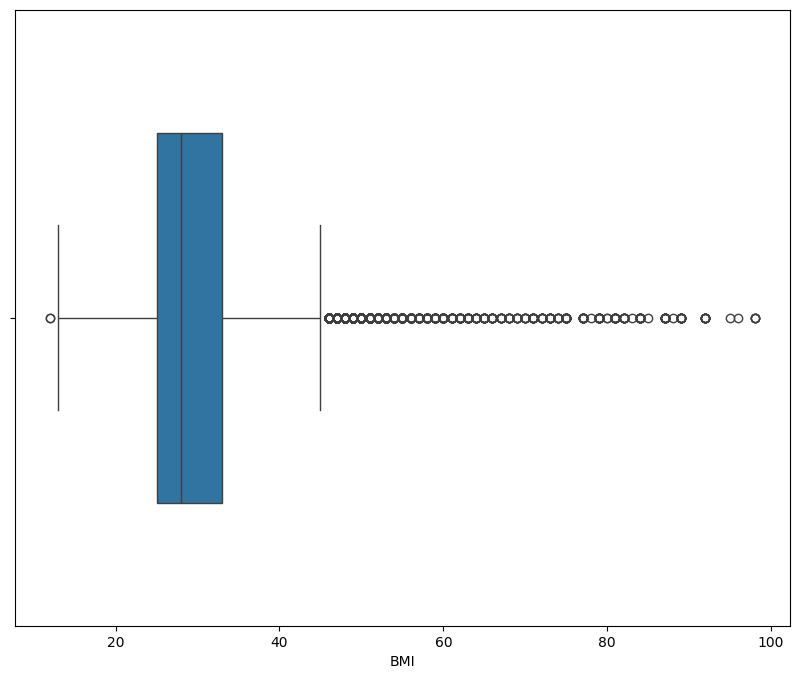

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.boxplot(x="BMI", data=balanced_df, ax=ax, width=.6)
#ax.xaxis.set_tics()
plt.show()

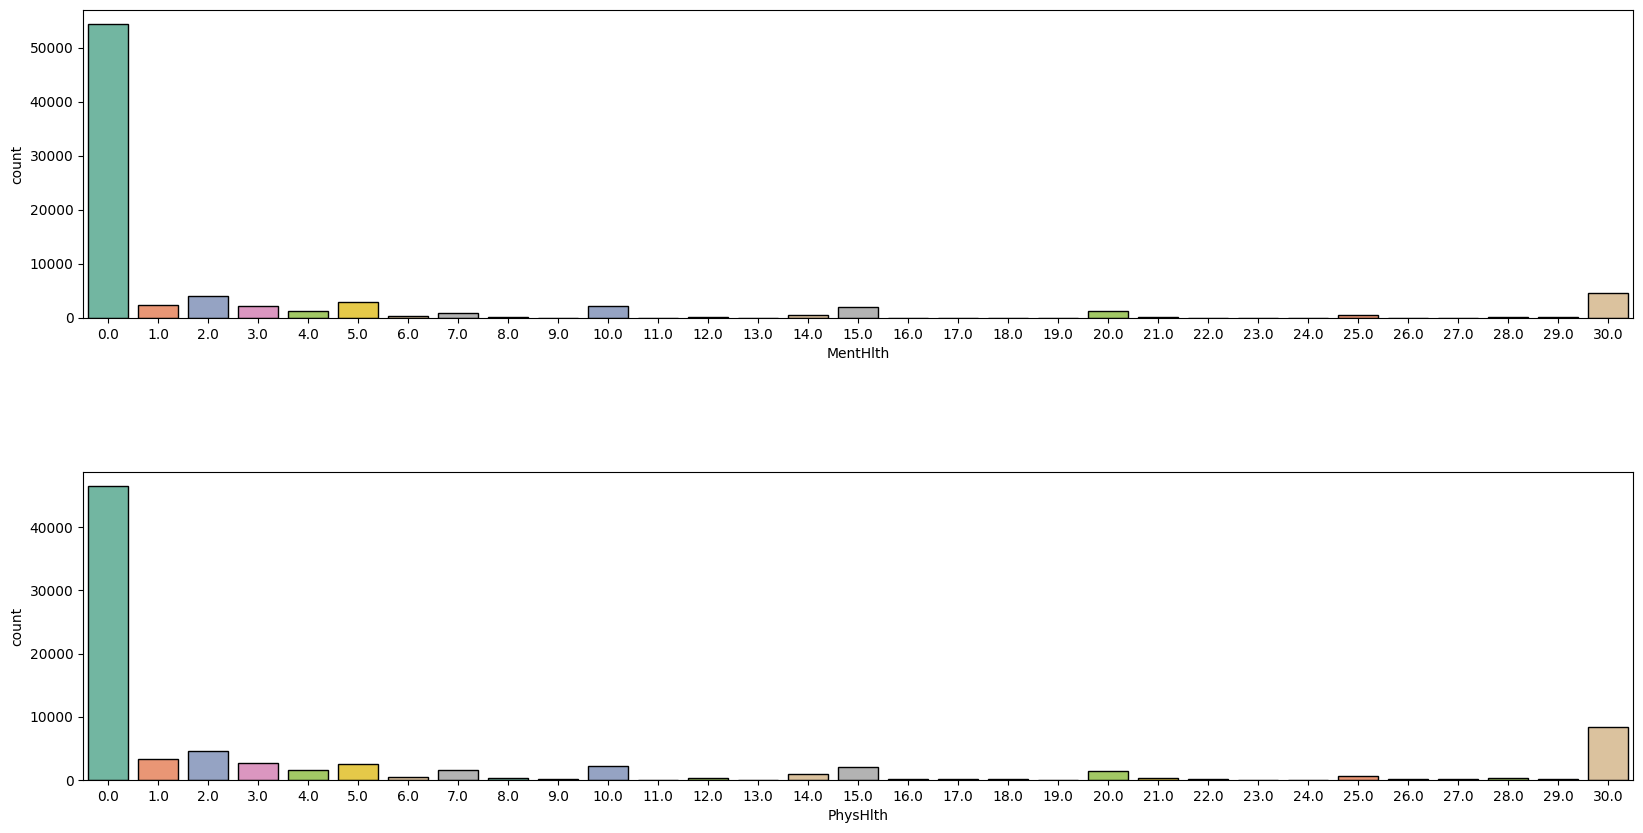

In [ ]:
ida_plot(df=balanced_df, li_col=['MentHlth', 'PhysHlth'], row=2, col=1, legend=False, figsize=(20,10))

# The distributions in the 50-50 binary datset have similar proportions as to the original dataset, however I'd like to make the following observations:



*   The mean age has shifted from 8 to a bit over 9 (55-54 to 60-64)
*   The mean income has dropped to category 6 from categoty 7
*   BMI Distribution has not changed
*   PhysHealth, Mental Health distribution hasn't changed much either





# **Since the dataset is now pruned - looked up for more datasets which matched our dataset - found a dataset for 2021**

In [ ]:
#Get the 2021 50-50 split dataset:

#sourced from https://www.kaggle.com/datasets/julnazz/diabetes-health-indicators-dataset/data

#filepath - https://drive.google.com/file/d/1Tdas72NLrBajEuatJo4sU3sZRT35ZBxK/view?usp=drive_link

file_diabeties_2021_012 = drive.CreateFile({'id':'1Tdas72NLrBajEuatJo4sU3sZRT35ZBxK'})
file_diabeties_2021_012.GetContentFile('brfss_diabeties_2021_012.csv')
dataset_diabeties_2021_012 = pd.read_csv('brfss_diabeties_2021_012.csv')
dataset_diabeties_2021_012.describe()
dataset_diabetes_2021_012 = dataset_diabeties_2021_012

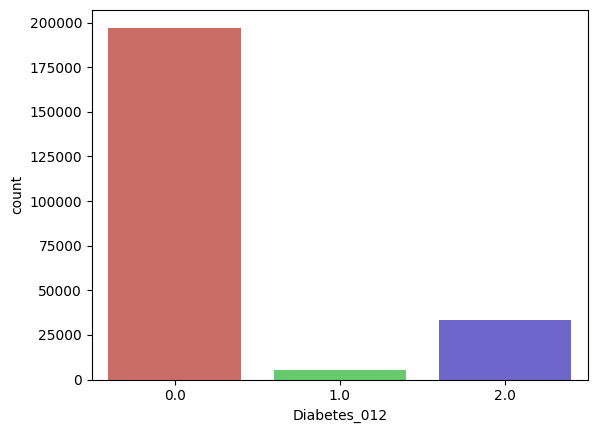

In [ ]:
sns.countplot(x='Diabetes_012', data=dataset_diabeties_2021_012, palette='hls')
plt.show()

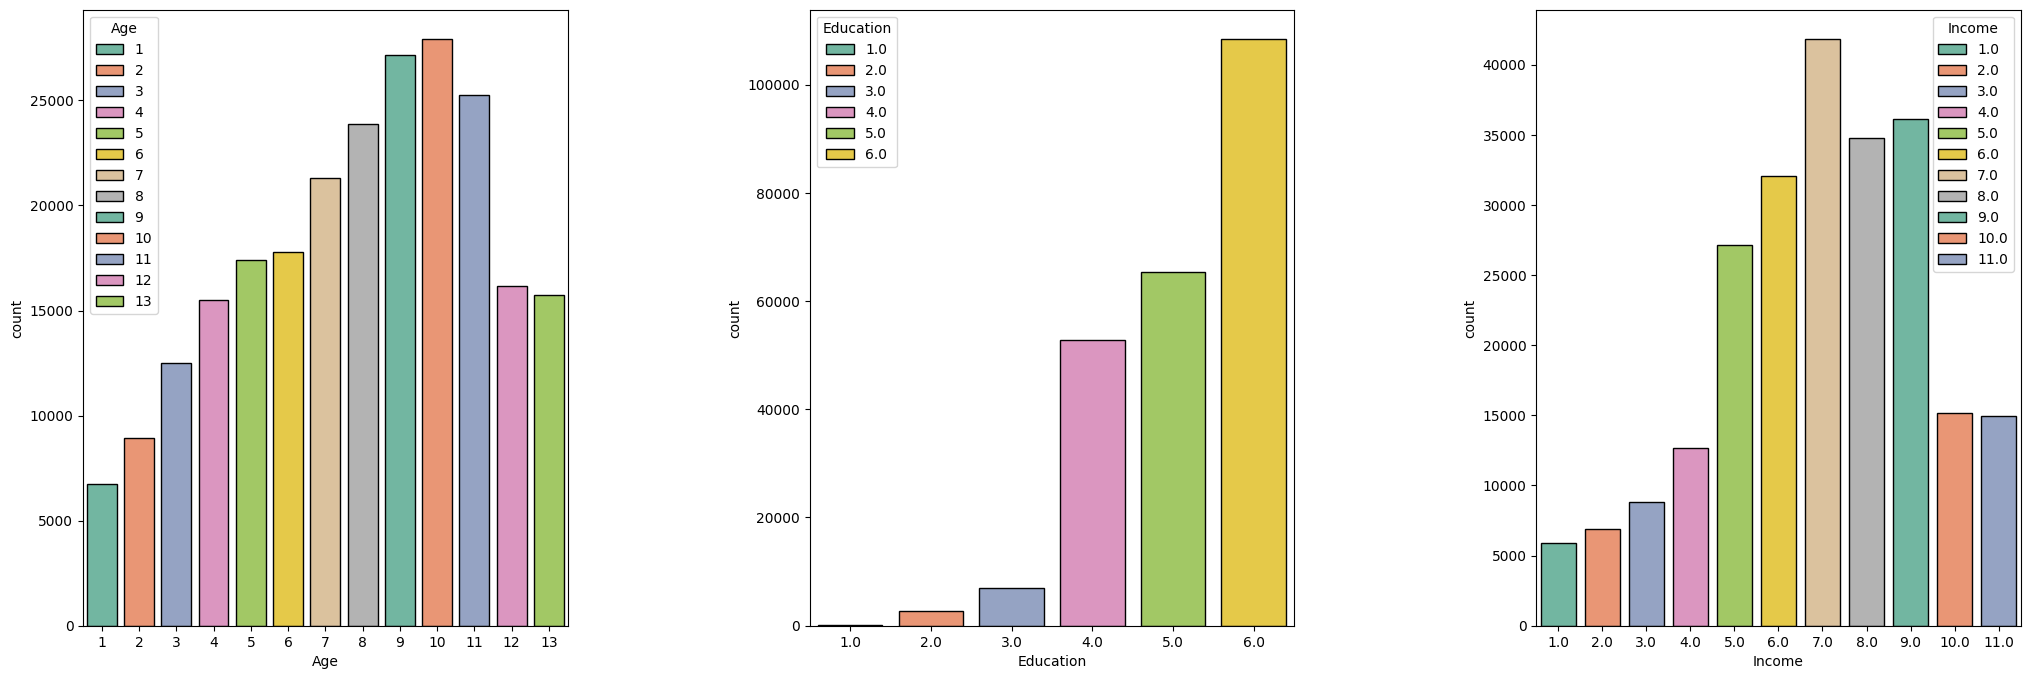

In [ ]:
ida_plot(df=dataset_diabeties_2021_012, li_col=['Age', 'Education', 'Income'], row=1, col=3, figsize=(25, 8))

**Two additional classes for income are added here: **

1.   New categories 9, 10, 11 for the income categories
2.   Similar distribution for age and education - more variance for the age




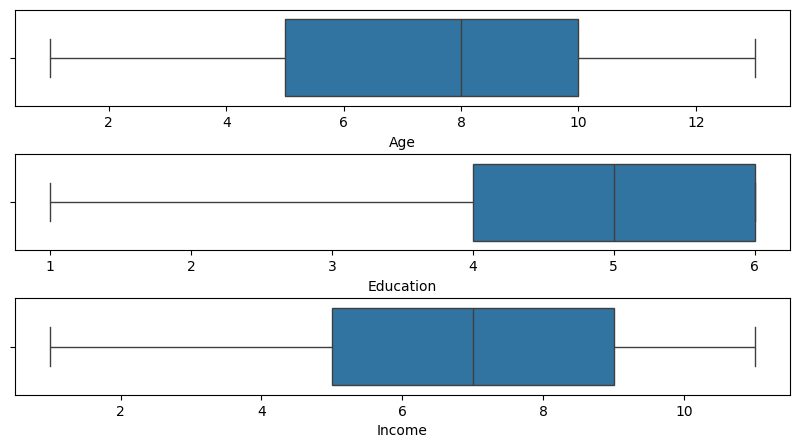

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 5))


for i,col in enumerate(['Age','Education', 'Income']):
  #plt.subplot(4,2,i+1)
  sns.boxplot(x=col, data=dataset_diabetes_2021_012, ax=ax[i])
  plt.subplots_adjust(
        wspace=0.5,
        hspace=0.5
  )
plt.show()

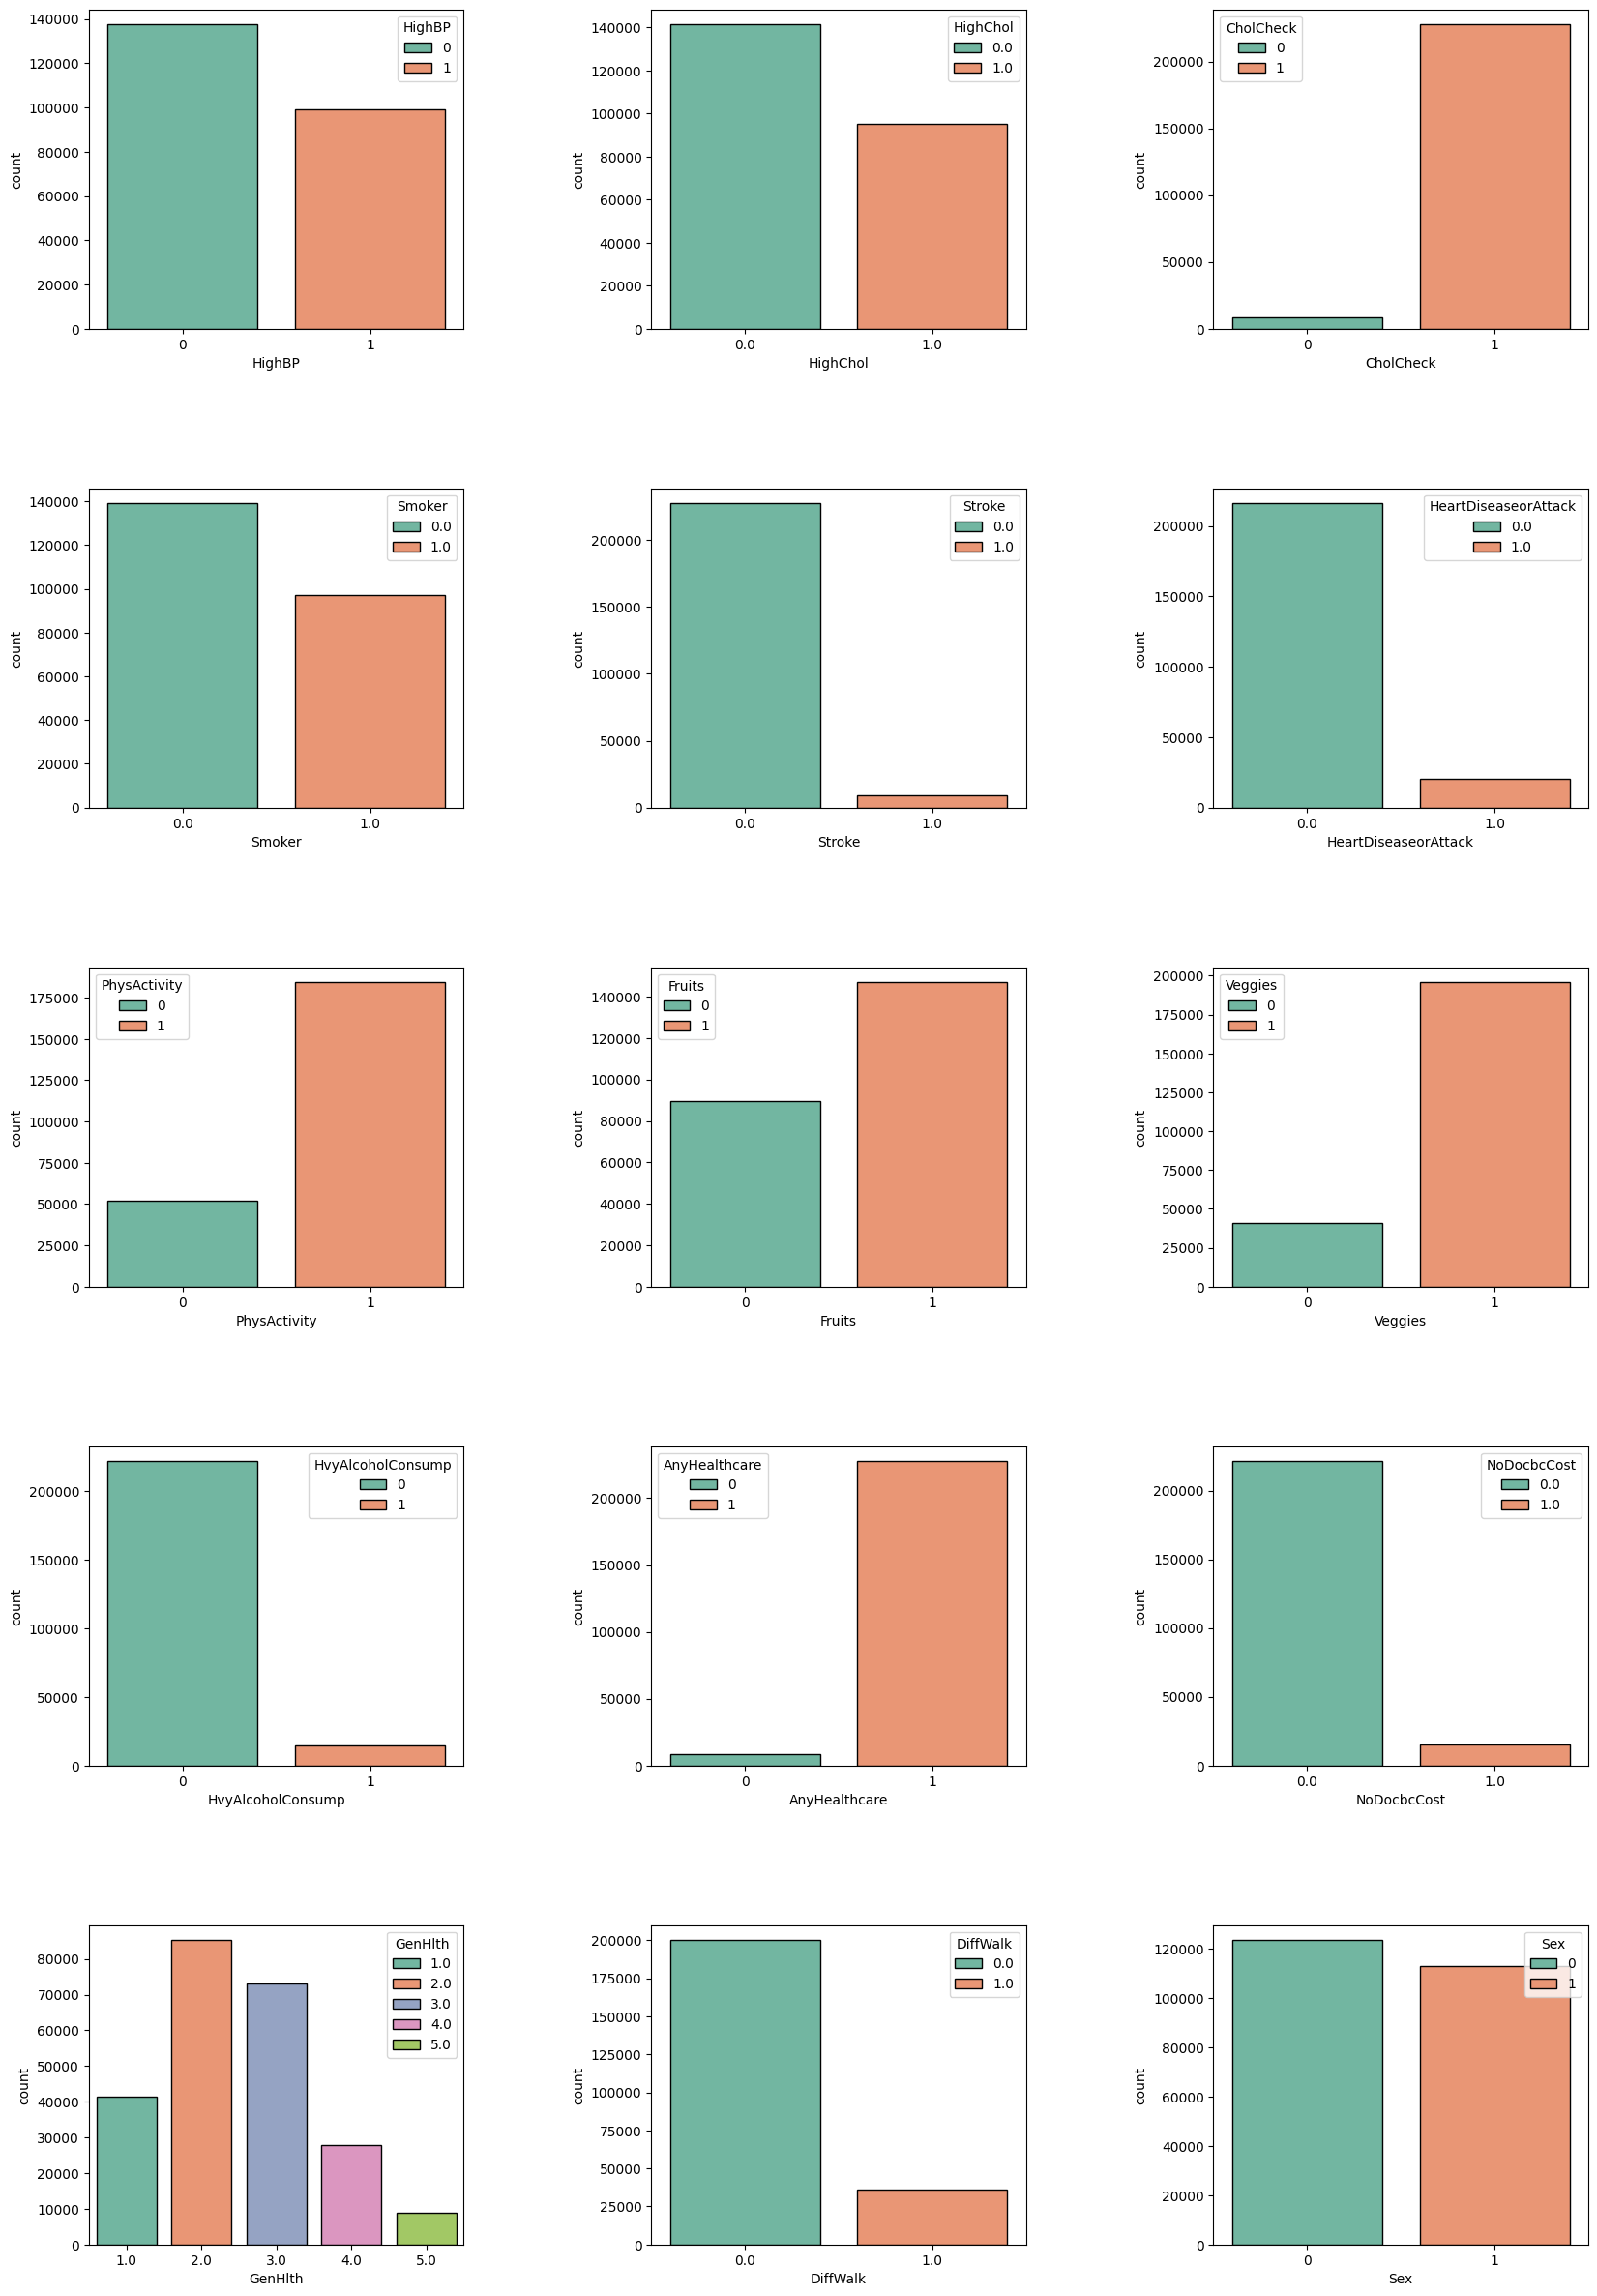

In [ ]:
cols = [x for x in dataset_diabeties_2021_012.columns if x not in ["Diabetes_012", "Age", "Education", "Income", "BMI", "MentHlth", "PhysHlth"]]
ida_plot(dataset_diabeties_2021_012, cols, int(len(cols)/3+0.5), figsize=(20, 30))

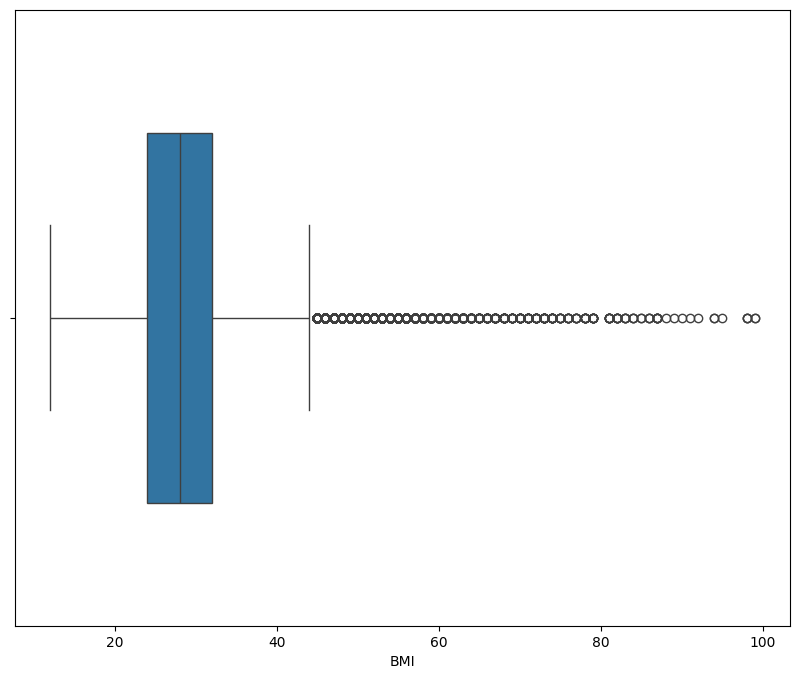

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.boxplot(x="BMI", data=dataset_diabeties_2021_012, ax=ax, width=.6)
#ax.xaxis.set_tics()
plt.show()

In [ ]:
dataset_diabeties_2021_012['BMI'].describe()

count    236378.000000
mean         28.953579
std           6.552055
min          12.000000
25%          24.000000
50%          28.000000
75%          32.000000
max          99.000000
Name: BMI, dtype: float64

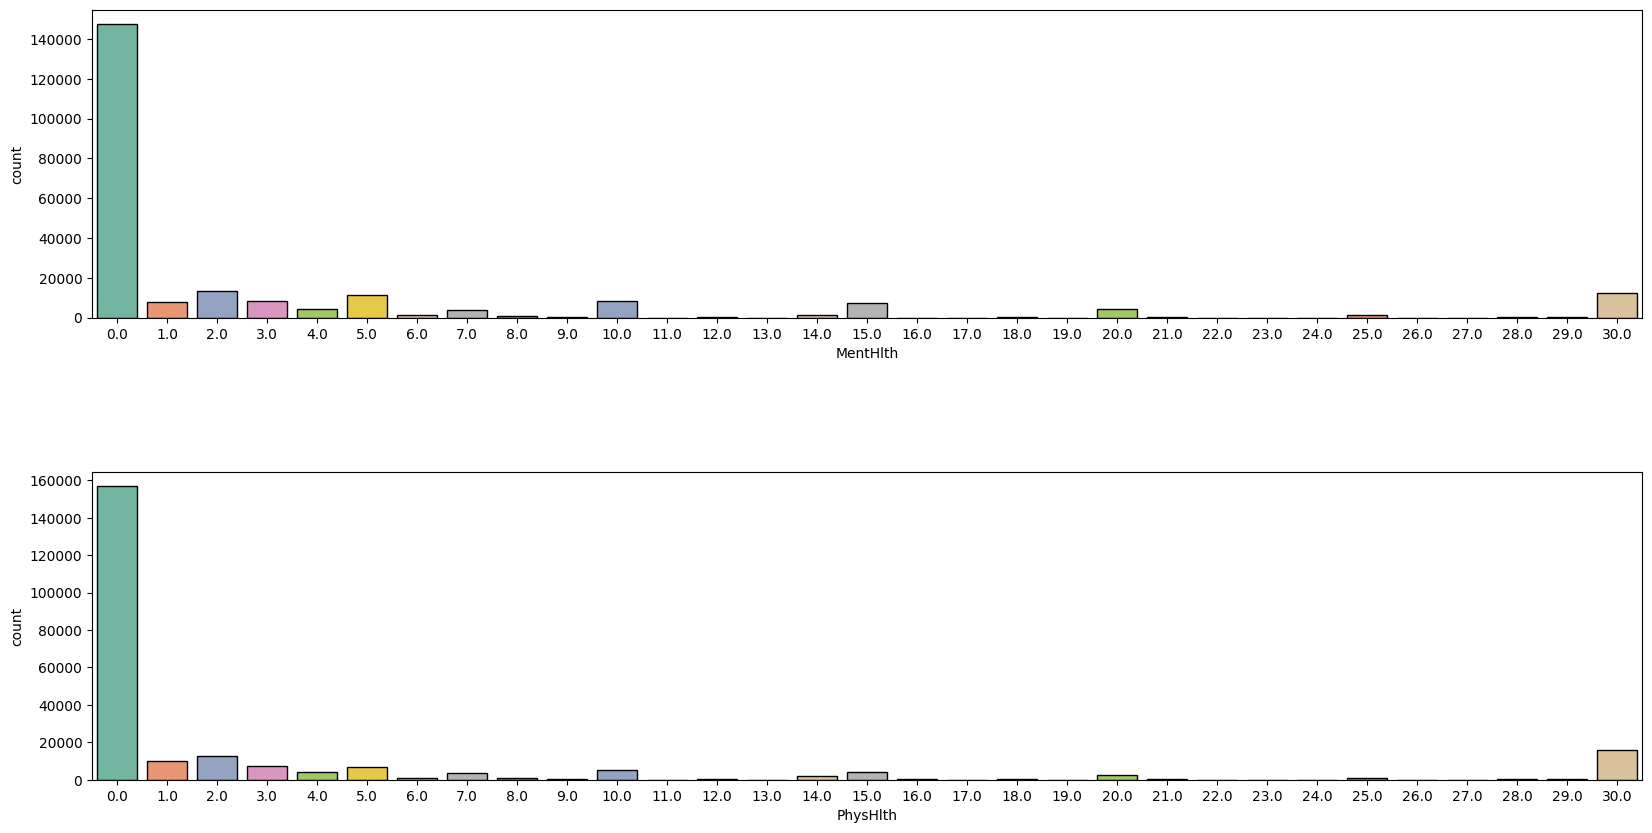

In [ ]:
ida_plot(df=dataset_diabeties_2021_012, li_col=['MentHlth', 'PhysHlth'], row=2, col=1, legend=False, figsize=(20,10))

In [ ]:
dataset_diabeties_2021_012.groupby(['Diabetes_012']).size()

Diabetes_012
0.0    197191
1.0      5619
2.0     33568
dtype: int64

In [ ]:
#Convert the 2021 dataset to binary:
dataset_diabeties_2021_binary = dataset_diabeties_2021_012
dataset_diabeties_2021_binary['Diabetes_012'] = dataset_diabeties_2021_binary['Diabetes_012'].replace({1:0})
dataset_diabeties_2021_binary['Diabetes_012'] = dataset_diabeties_2021_binary['Diabetes_012'].replace({2:1})
dataset_diabeties_2021_binary = dataset_diabeties_2021_binary.rename(columns={'Diabetes_012' : 'Diabetes_binary'})
dataset_diabeties_2021_binary.Diabetes_binary.unique()

array([0., 1.])

In [ ]:
dataset_diabeties_2021_binary.groupby(['Diabetes_binary']).size()

Diabetes_binary
0.0    202810
1.0     33568
dtype: int64

In [ ]:
class1_num = len(dataset_diabeties_2021_binary[dataset_diabeties_2021_binary['Diabetes_binary'] ==1])
# Sampling and create new dataframe to contain the two balanced classes
loop_condition = True
iterations = 0;
seed = 12
while(loop_condition==True and iterations < 5):


  #Pick the No diabeties samples such that we maintain the proportion of HighBP and HighCol same as the original dataset
  #Pure random selection results in the final combined dataset where we have respondents with highBP=1 > highBP=0 and likewise for highchol
  #/2 gives us roughly the same proportion in both the features
  samples_to_pick_nobp_nochol = int(class1_num/2)

  sample_0_0  = dataset_diabeties_2021_binary.loc[(dataset_diabeties_2021_binary['Diabetes_binary']==0) & (dataset_diabeties_2021_binary['HighBP']==0) & (dataset_diabeties_2021_binary['HighChol'] == 0)].sample(samples_to_pick_nobp_nochol, random_state=seed)
  sample_0_1 =  dataset_diabeties_2021_binary.loc[dataset_diabeties_2021_binary['Diabetes_binary']==0].sample((class1_num - samples_to_pick_nobp_nochol), random_state=seed)
  sample_0 = pd.concat([sample_0_0, sample_0_1])

  sample_1 = dataset_diabeties_2021_binary[dataset_diabeties_2021_binary['Diabetes_binary']==1]
  balanced_2021_df = pd.concat([sample_0, sample_1], axis=0)
  highbp_class0 = len(balanced_2021_df[balanced_2021_df['HighBP'] == 0])
  highbp_class1 = len(balanced_2021_df[balanced_2021_df['HighBP'] == 1])
  print(f"{iterations} 0 : {highbp_class0} 1 : {highbp_class1}")

  highchol_class0 = len(balanced_2021_df[balanced_2021_df['HighChol'] == 0])
  highchol_class1 = len(balanced_2021_df[balanced_2021_df['HighChol'] == 1])
  print(f"{iterations} 0 : {highchol_class0} 1 : {highchol_class1}")

  if((highbp_class1 < highbp_class0)  & (highchol_class1 < highchol_class0) ):
    loop_condition = False
    print("Making loop condition False")
  else:
    seed = random.randint(0, 99)

  iterations = iterations+1

0 0 : 36322 1 : 30814
0 0 : 39601 1 : 27535
Making loop condition False


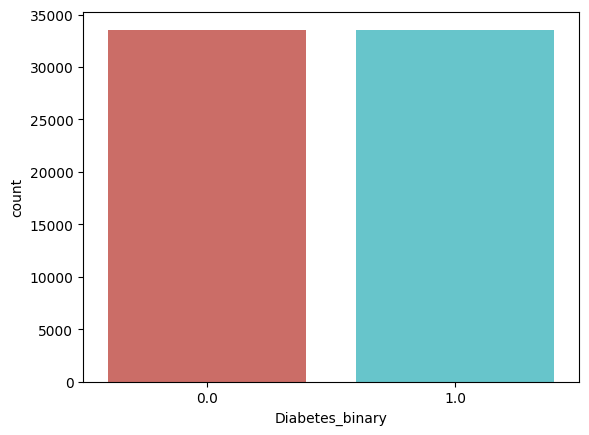

In [ ]:
sns.countplot(x='Diabetes_binary', data=balanced_2021_df, palette='hls')
plt.show()

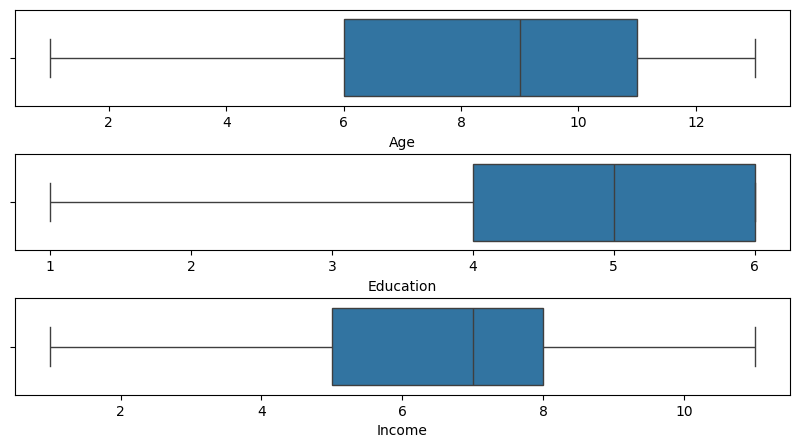

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 5))


for i,col in enumerate(['Age','Education', 'Income']):
  #plt.subplot(4,2,i+1)
  sns.boxplot(x=col, data=balanced_2021_df, ax=ax[i])
  plt.subplots_adjust(
        wspace=0.5,
        hspace=0.5
  )
plt.show()

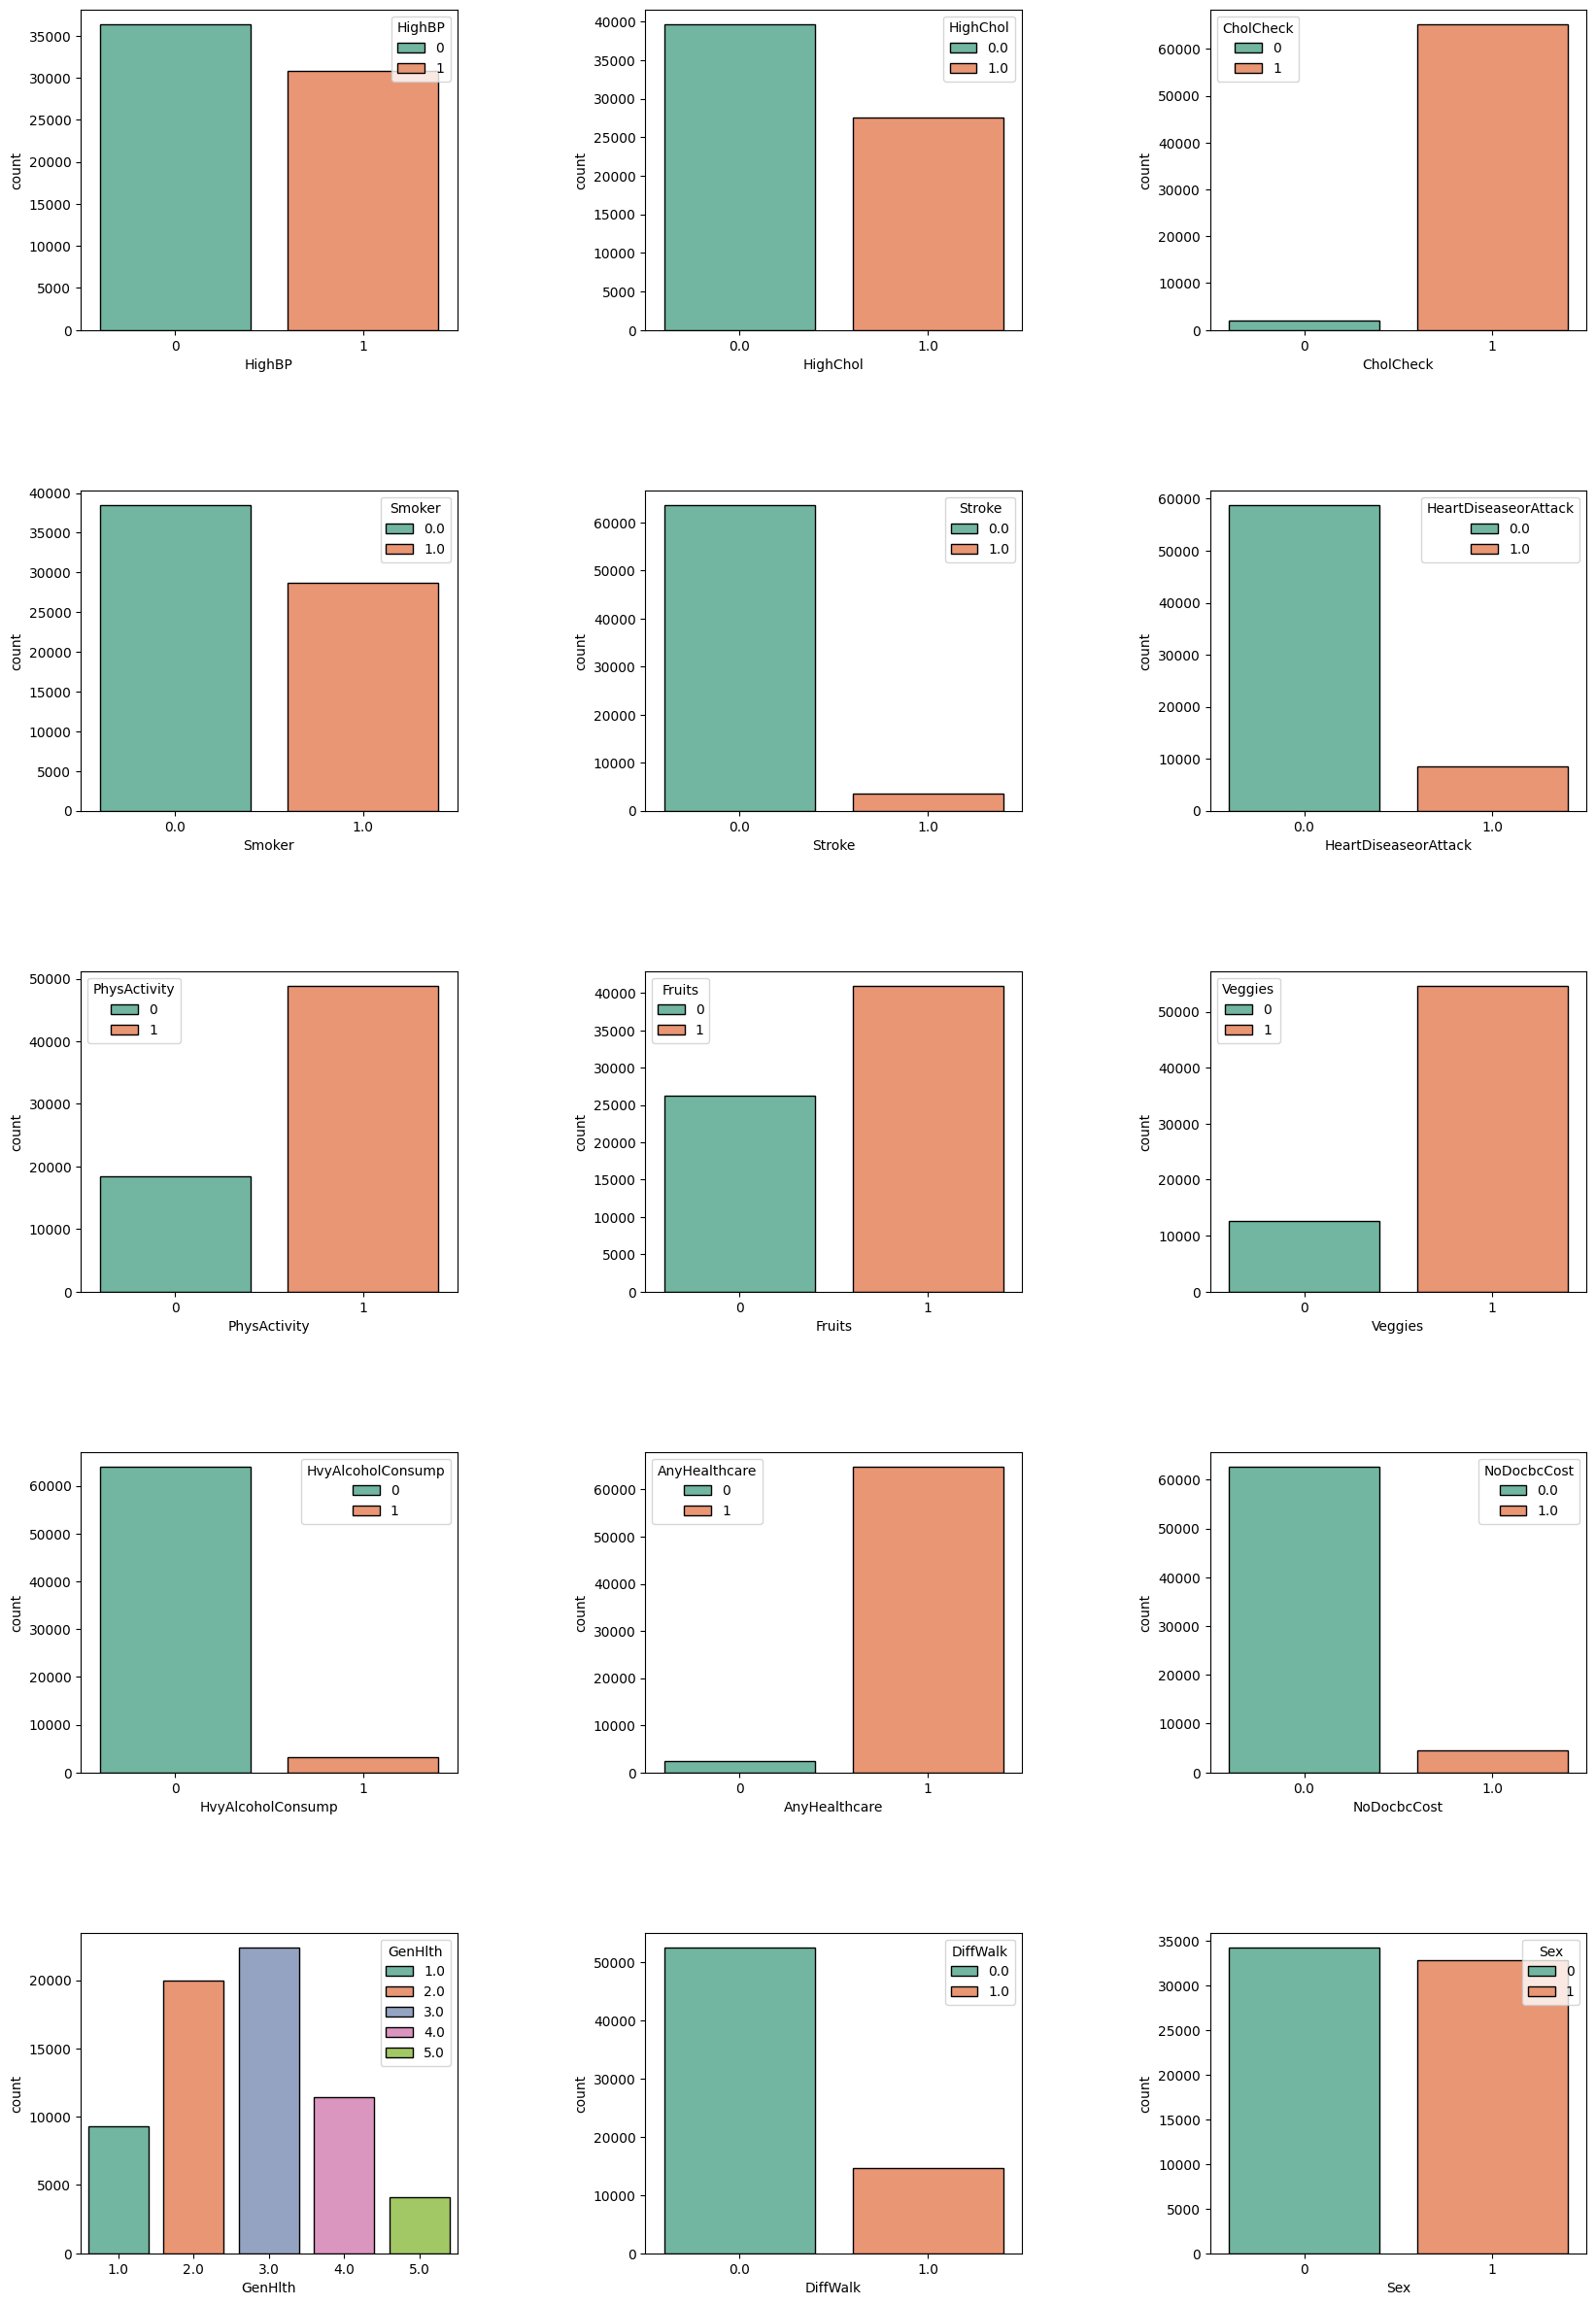

In [ ]:
cols = [x for x in balanced_2021_df.columns if x not in ["Diabetes_binary", "Age", "Education", "Income", "BMI", "MentHlth", "PhysHlth"]]
ida_plot(balanced_2021_df, cols, int(len(cols)/3+0.5), figsize=(20, 30))

#Getting the balanced data from kaggle wasn't feasible beause it has affected the distribution of HighBP and HighCol - in the larger data set more respondents had  Higher

*   Higher amount of respondents have never been told by a professional to have high blood pressure
*   Same for high col


In [ ]:
balanced_combined_df = pd.concat([balanced_df, balanced_2021_df], axis=0)

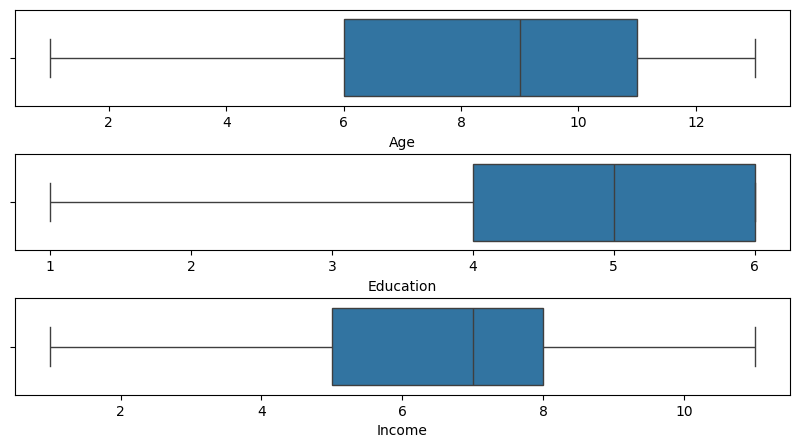

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 5))


for i,col in enumerate(['Age','Education', 'Income']):
  #plt.subplot(4,2,i+1)
  sns.boxplot(x=col, data=balanced_combined_df, ax=ax[i])
  plt.subplots_adjust(
        wspace=0.5,
        hspace=0.5
  )
plt.show()

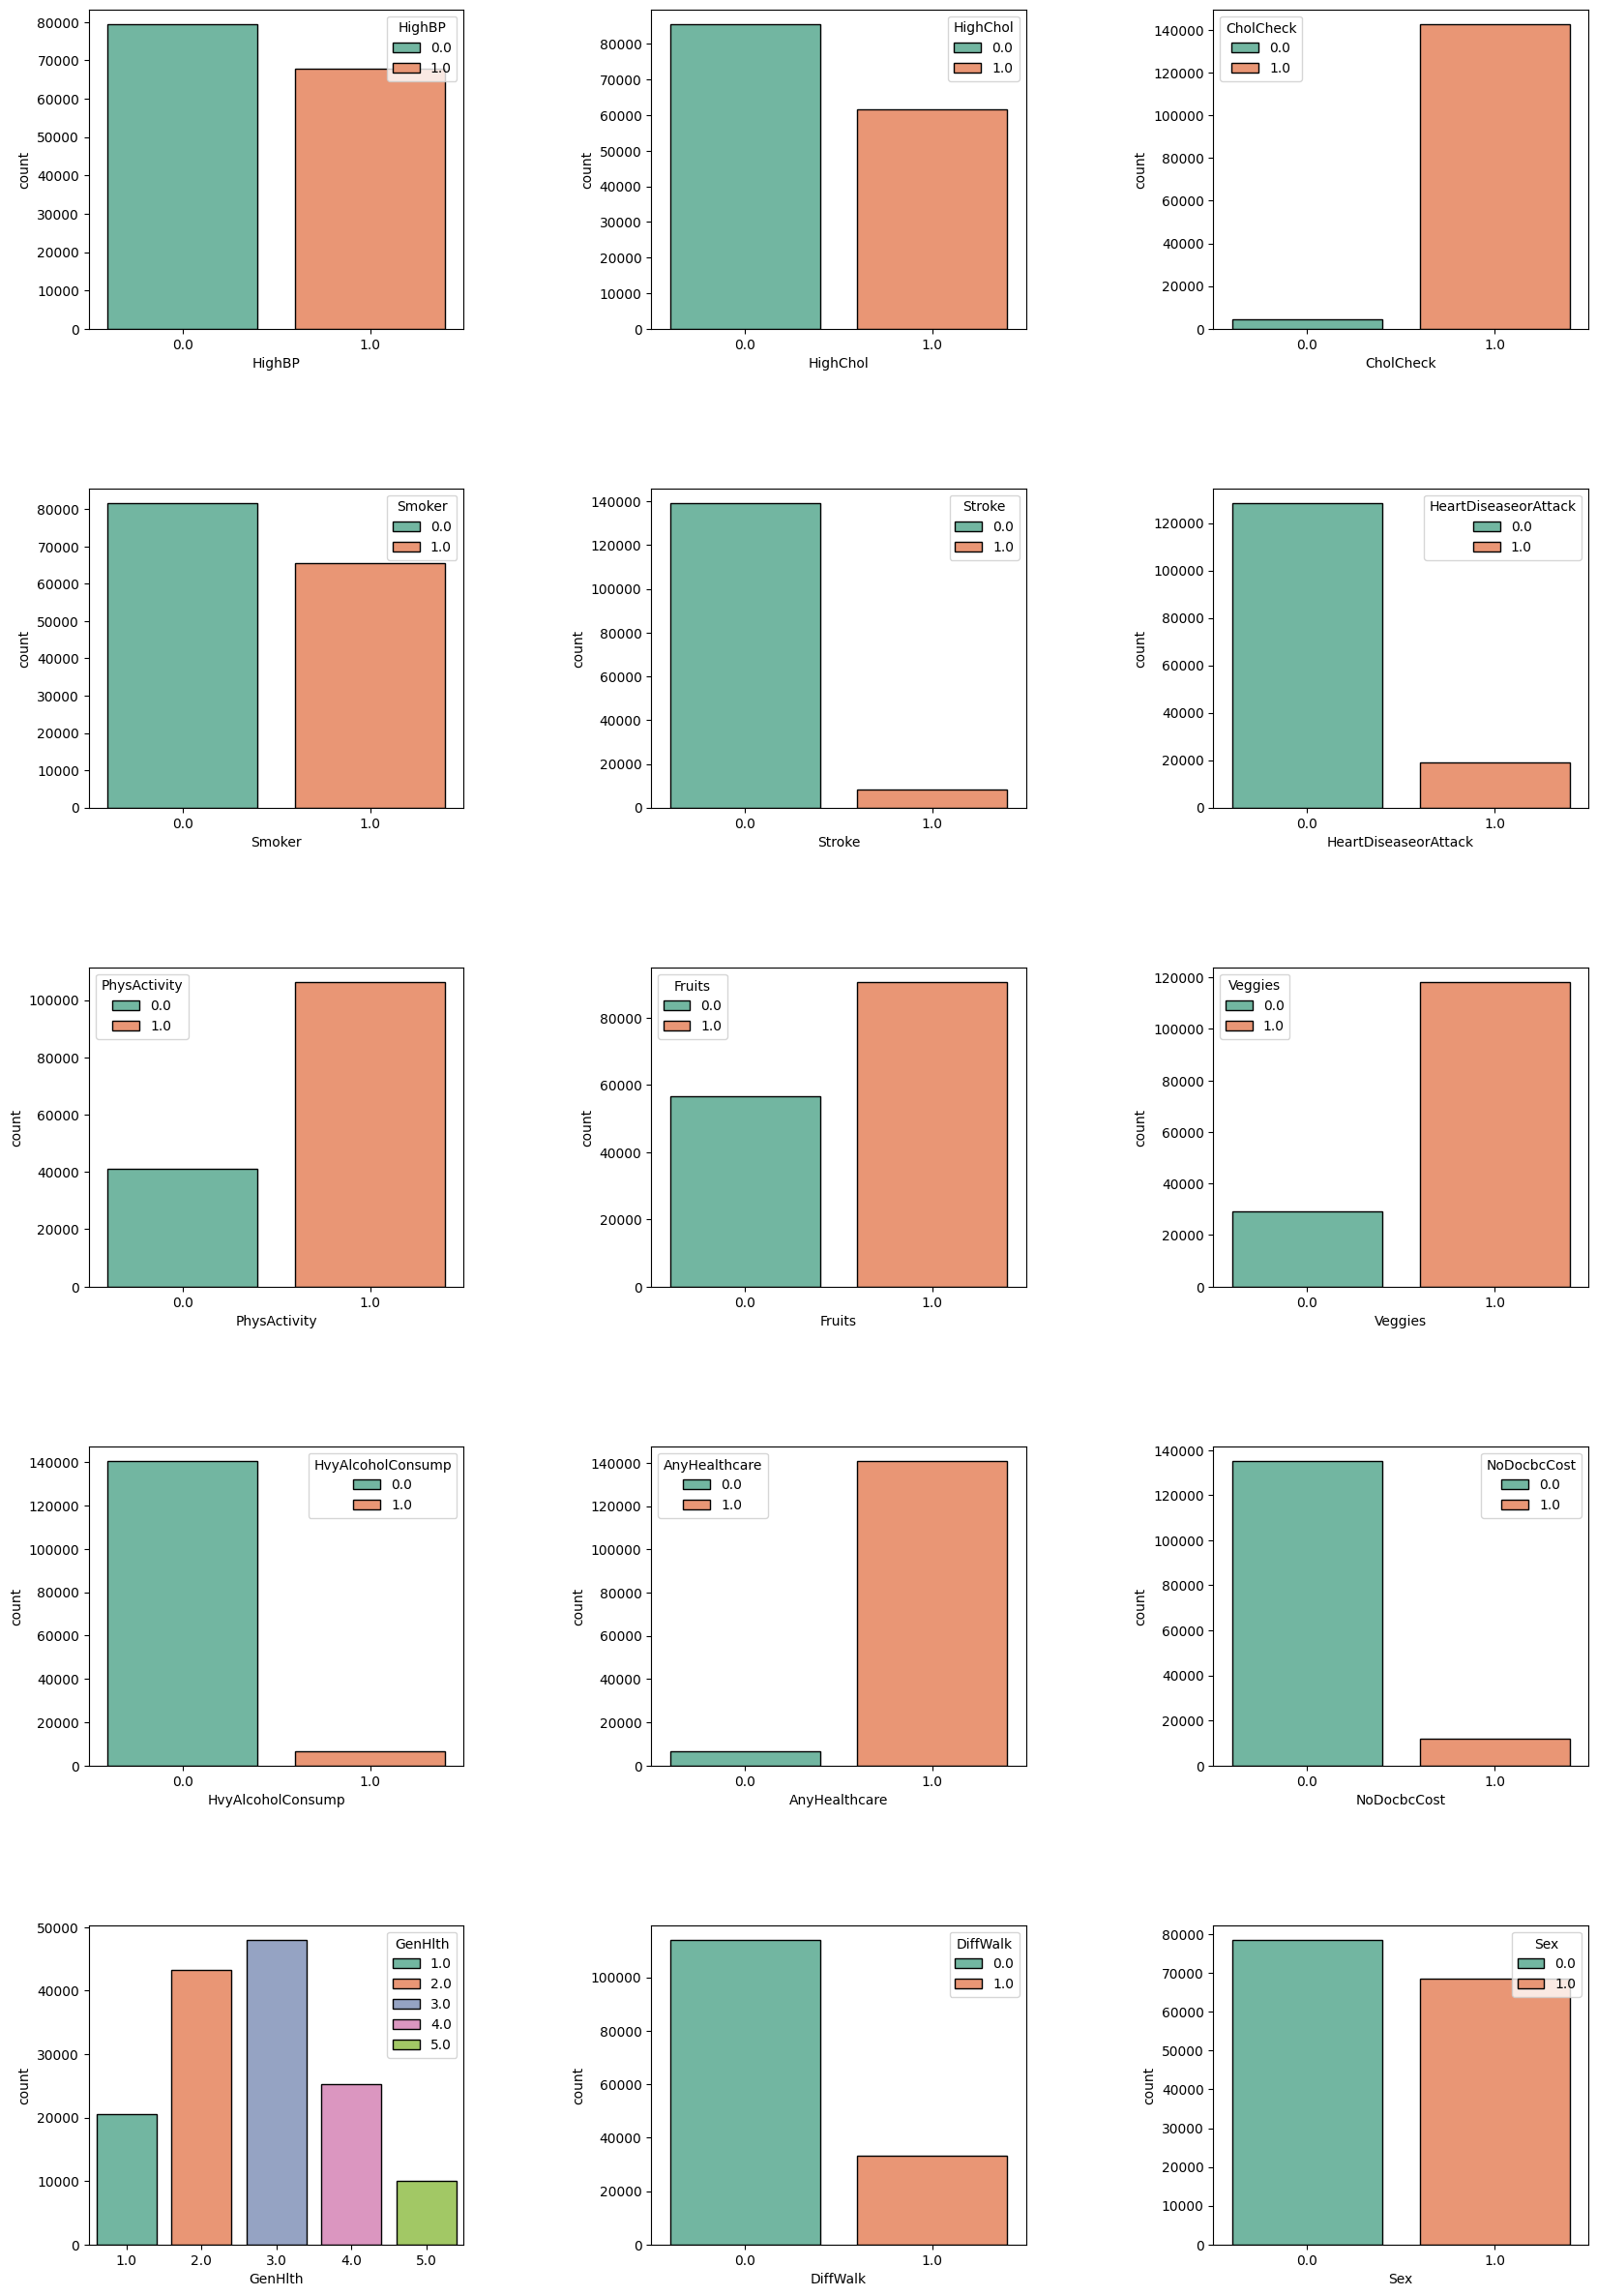

In [ ]:
cols = [x for x in balanced_combined_df.columns if x not in ["Diabetes_binary", "Age", "Education", "Income", "BMI", "MentHlth", "PhysHlth"]]
ida_plot(balanced_combined_df, cols, int(len(cols)/3+0.5), figsize=(20, 30))

In [ ]:
#combined_df = pd.concat([dataset_diabeties_21_50, dataset_diabeties50], axis=0).reset_index(drop=True)
combined_df = balanced_combined_df

# **Find Missing values**

In [ ]:
combined_df.isnull().sum()

In [ ]:
combined_df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,...,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000
mean,0.500000,0.460555,0.419308,0.969386,29.764879,0.445931,0.054864,0.128506,0.721422,0.615378,...,0.956625,0.082392,2.734652,3.918948,5.188041,0.226038,0.466701,8.222211,4.997294,6.148324
std,0.500002,0.498443,0.493448,0.172270,7.145347,0.497070,0.227716,0.334654,0.448301,0.486507,...,0.203700,0.274962,1.108790,8.137695,9.617442,0.418266,0.498892,3.074834,1.005931,2.322676
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.500000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,3.000000,5.000000,0.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


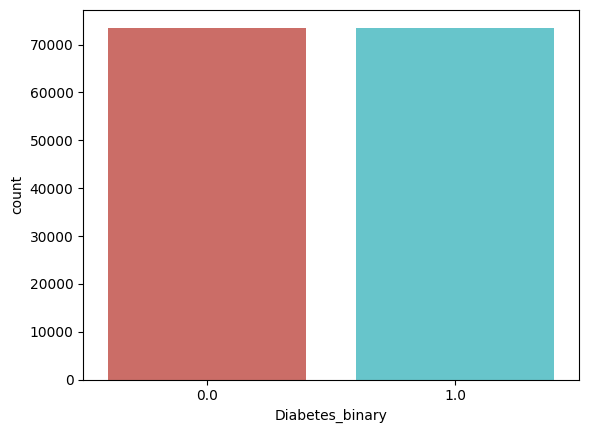

In [ ]:
sns.countplot(x='Diabetes_binary', data=combined_df, palette='hls')
plt.show()

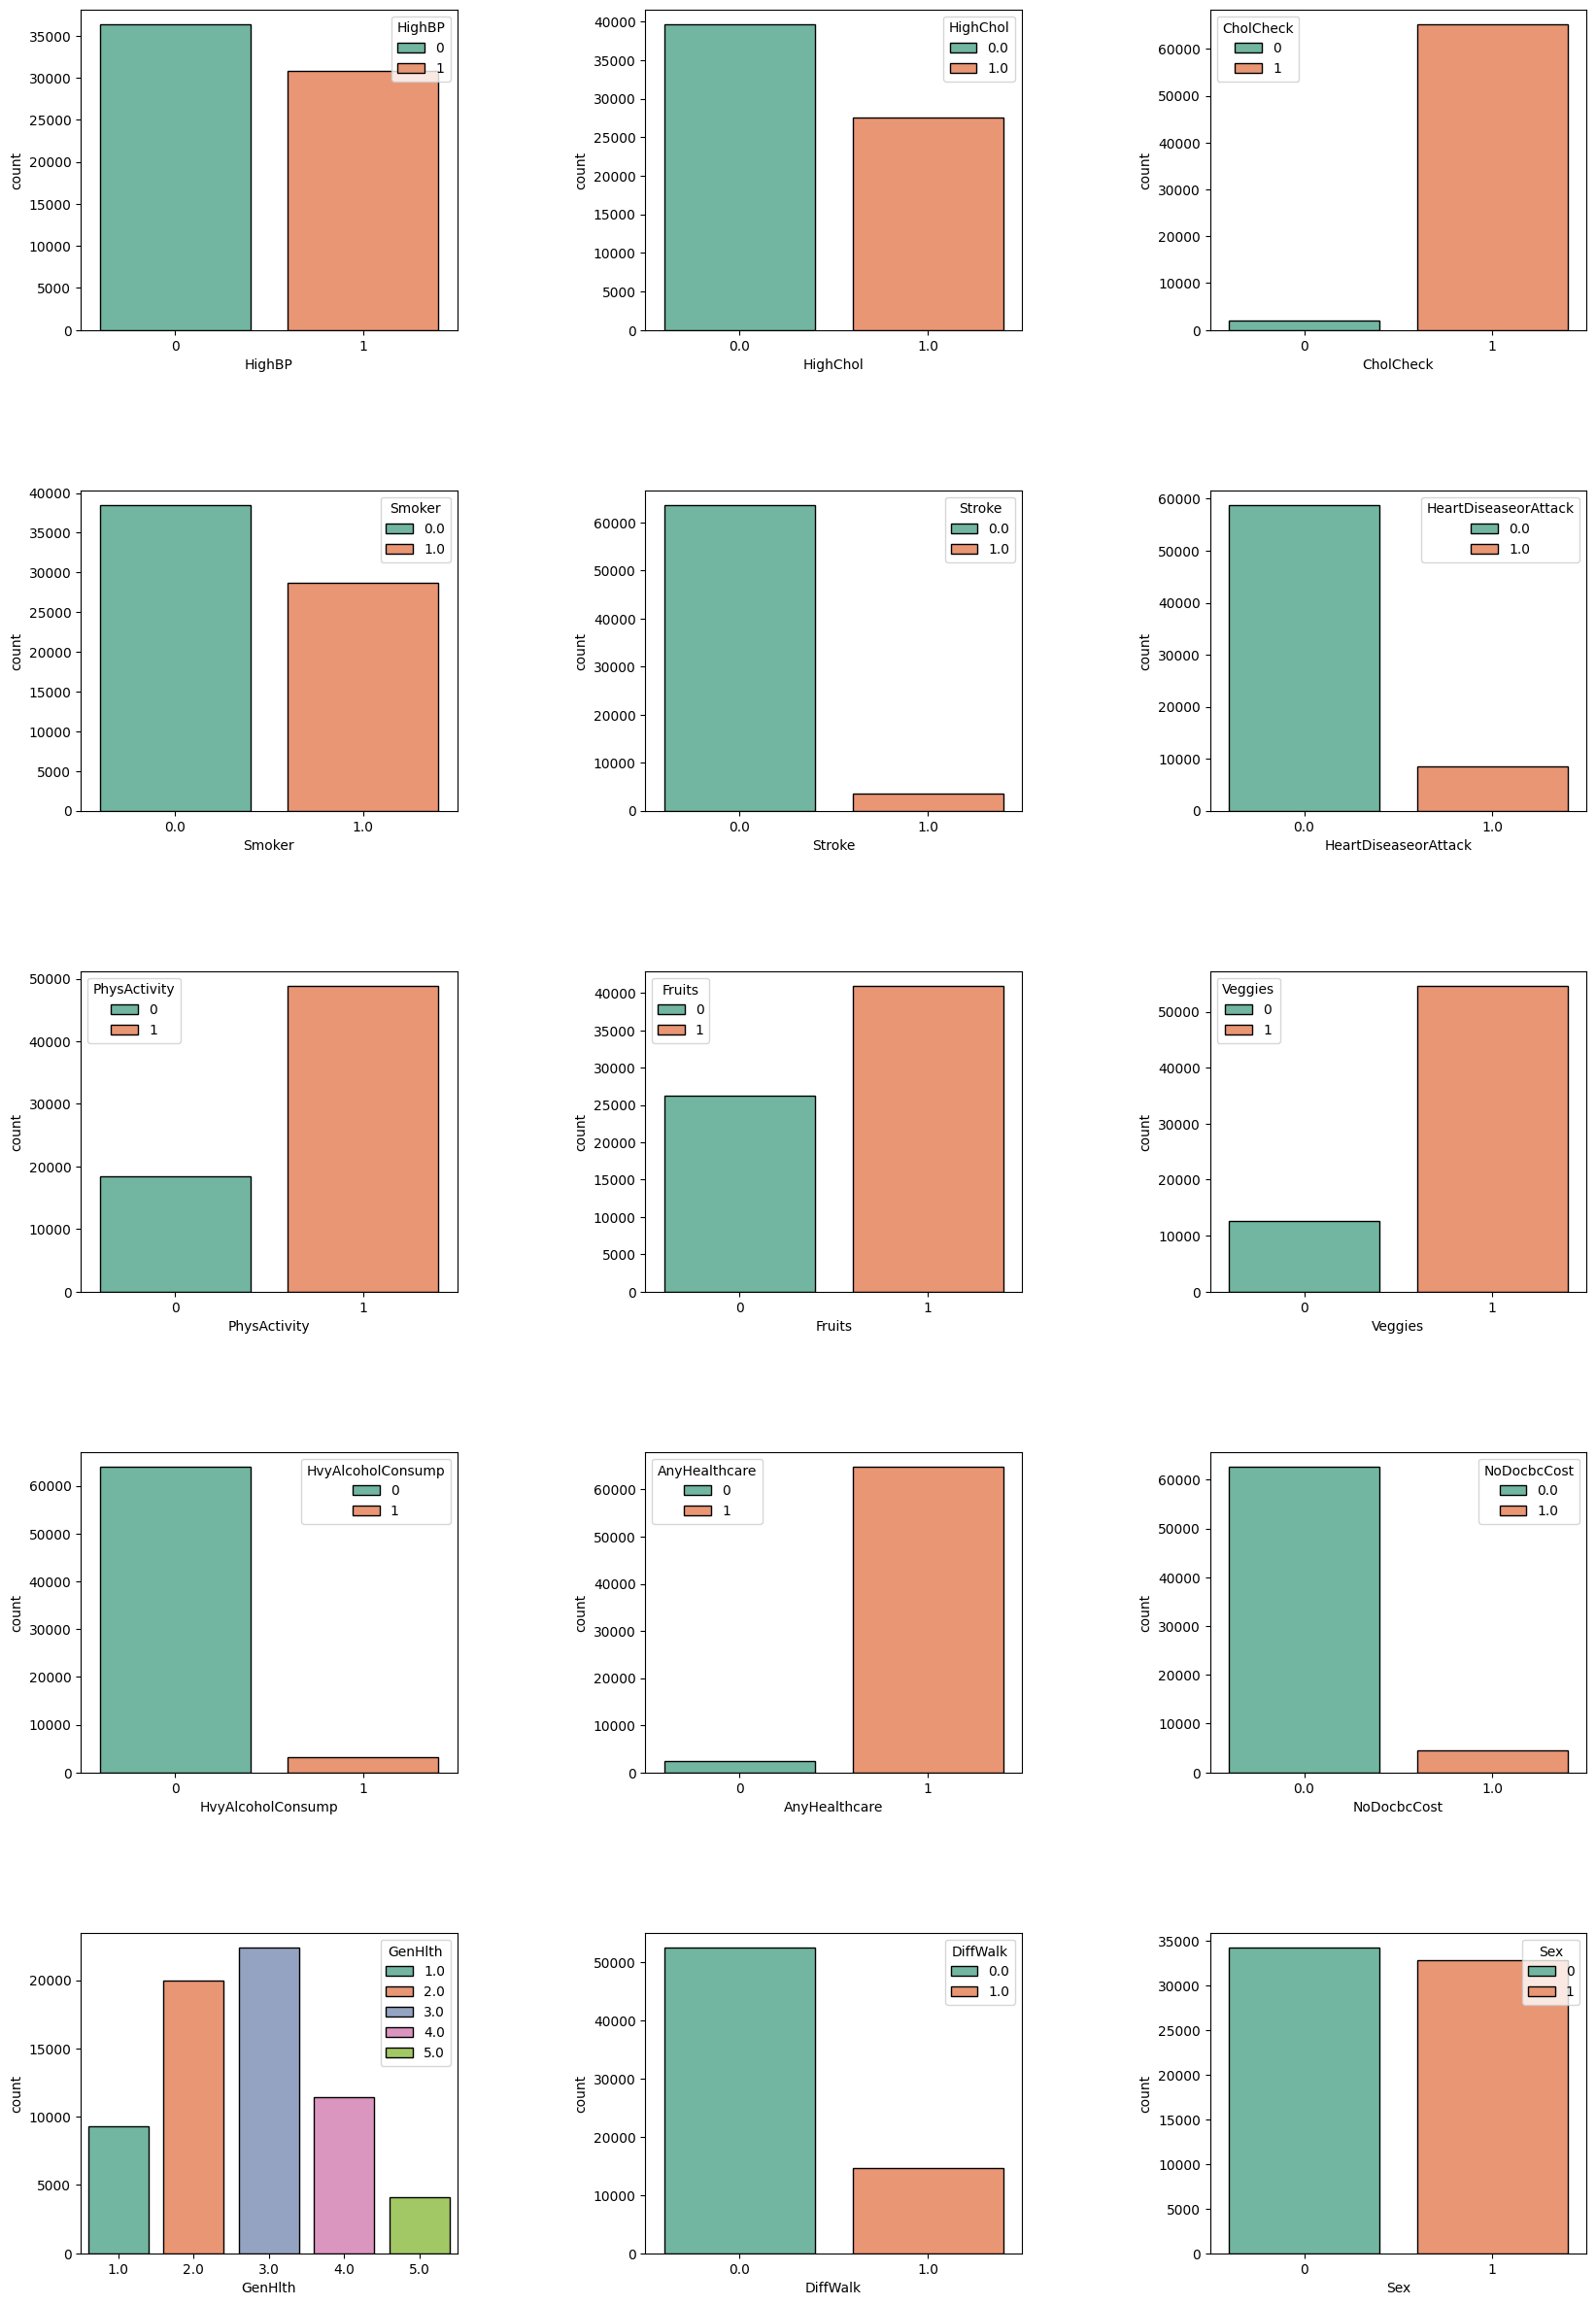

In [ ]:
cols = [x for x in balanced_df.columns if x not in ["Diabetes_binary", "Age", "Education", "Income", "BMI", "MentHlth", "PhysHlth"]]
ida_plot(balanced_2021_df, cols, int(len(cols)/3+0.5), figsize=(20, 30))

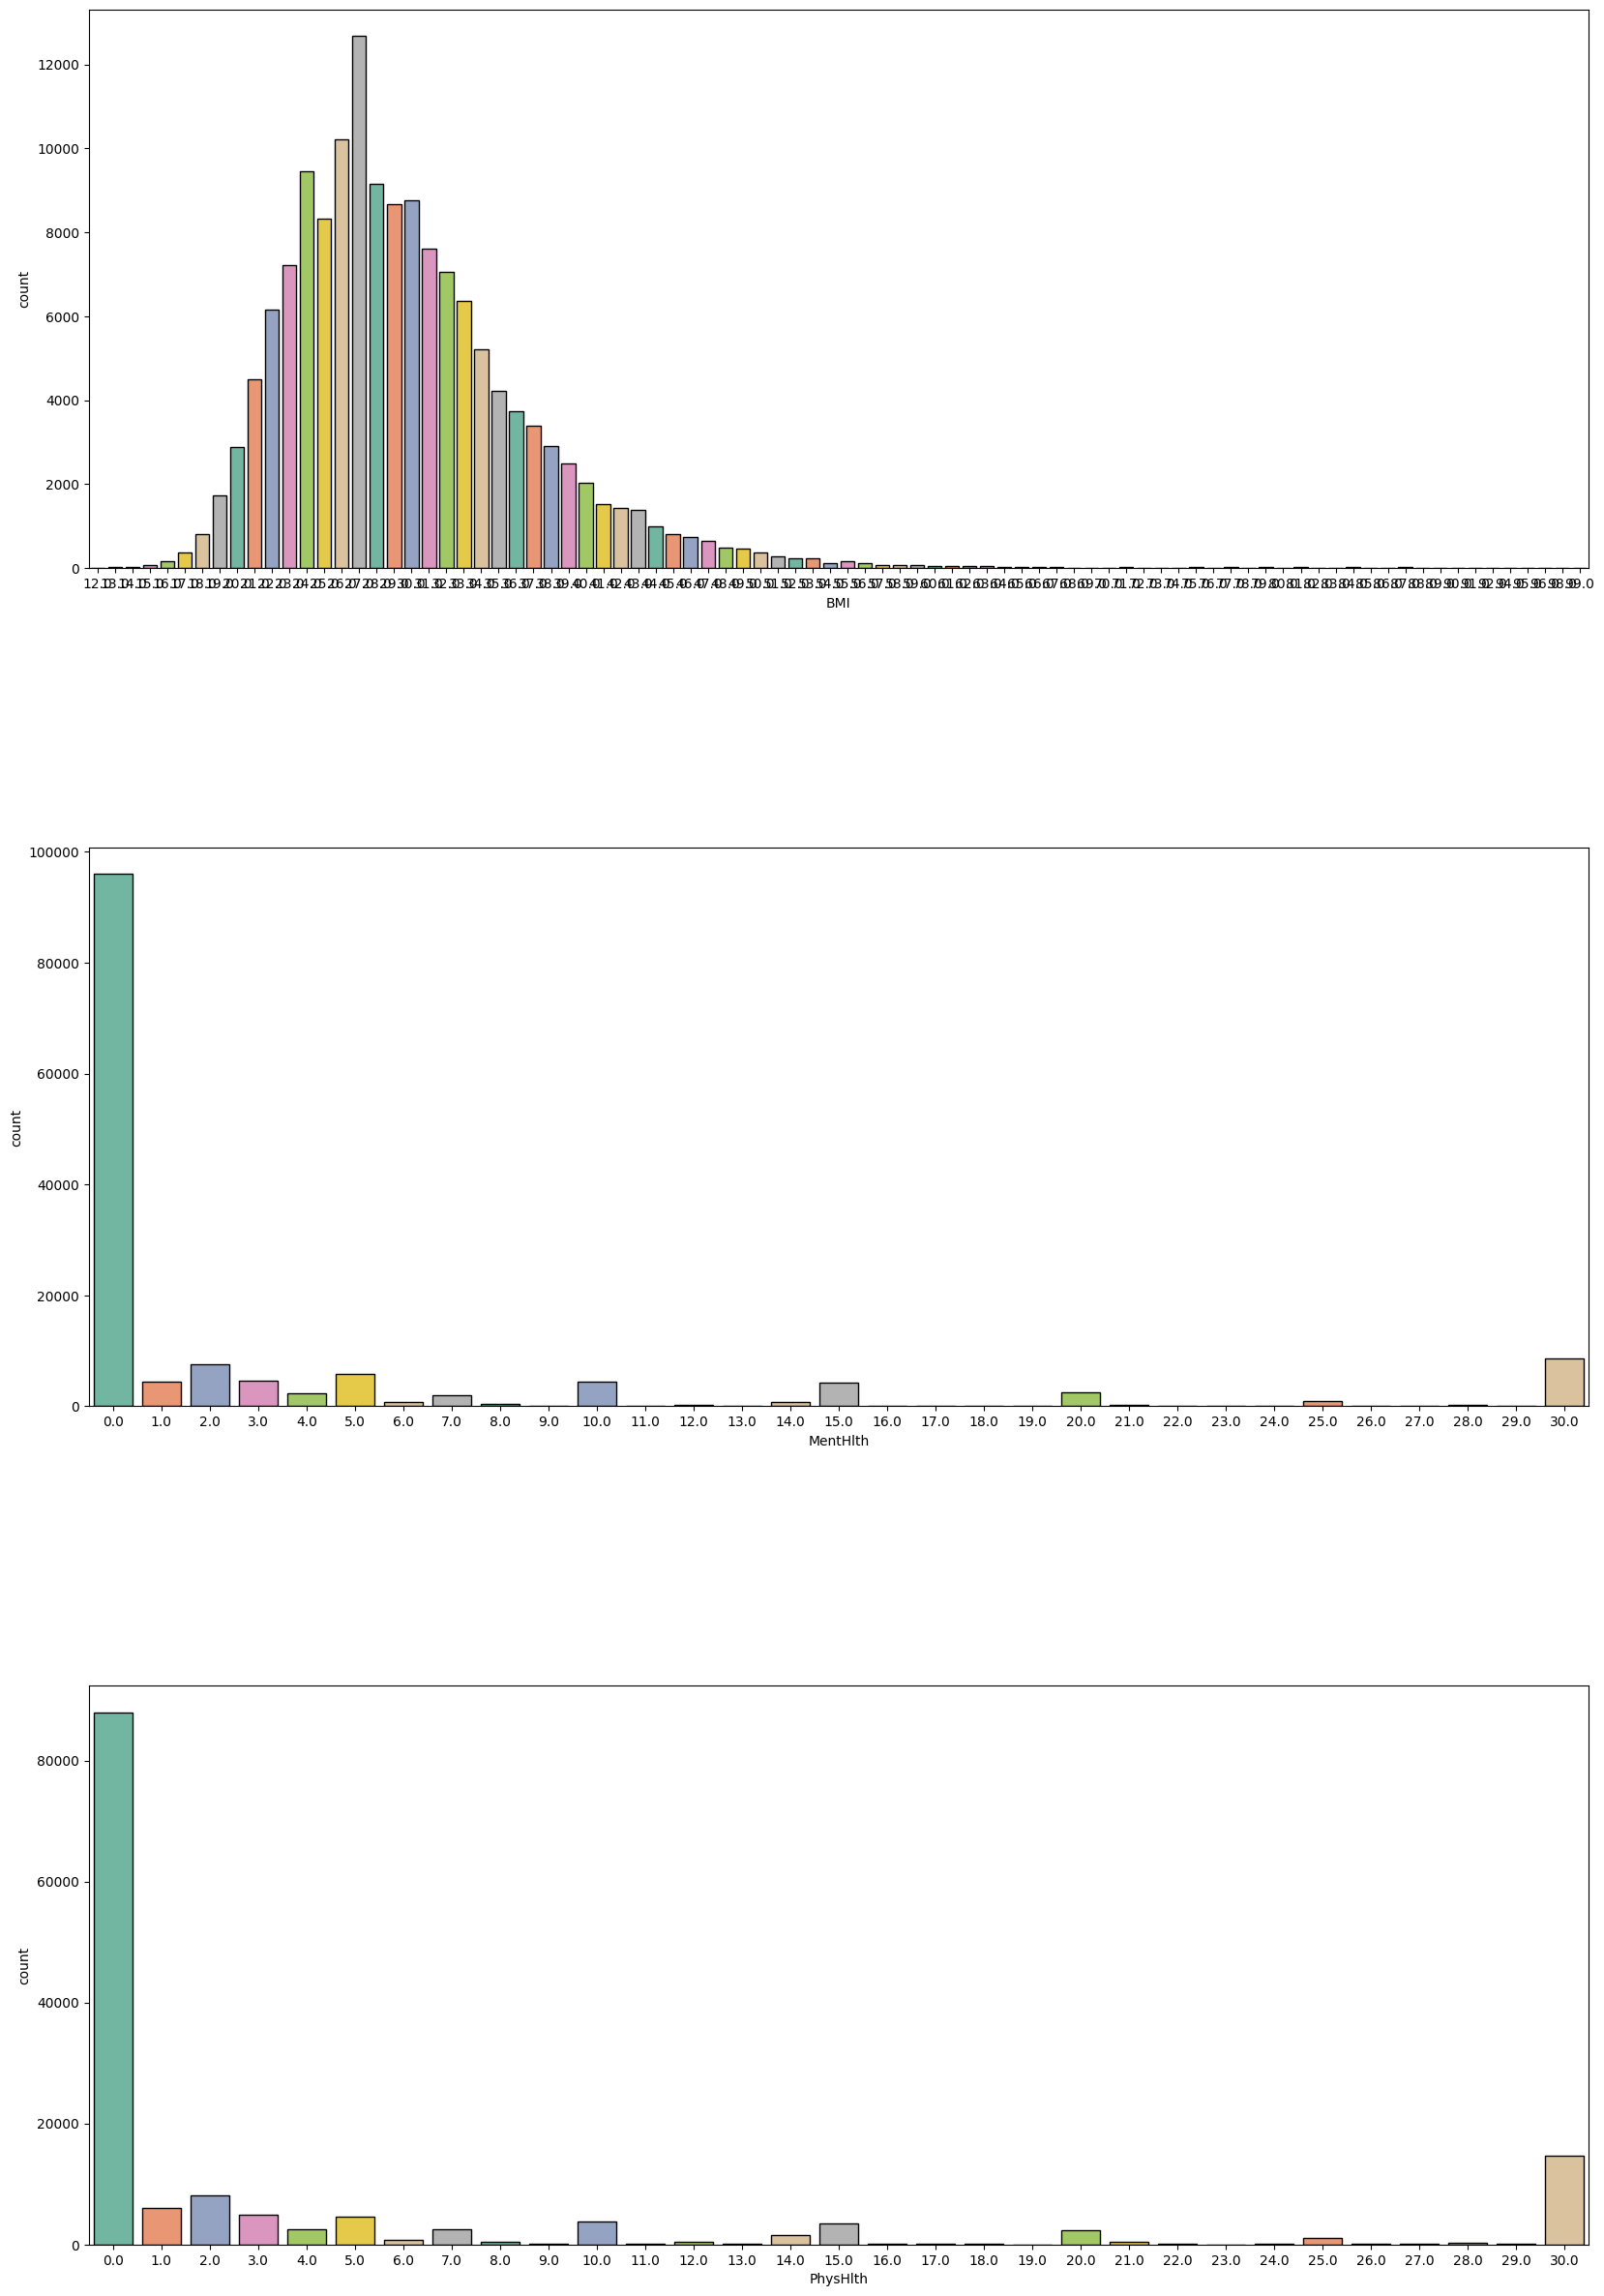

In [ ]:
ida_plot(df=combined_df, li_col=['BMI', 'MentHlth', 'PhysHlth'], row=3, col=1, legend=False, figsize=(20,30))

In [ ]:
def BMI_Description (BMI):

    if BMI < 18.5 :
        return 'Underweight'
    elif BMI >= 18.5 and BMI <= 24.9:
        return 'Normal weight'
    elif BMI >= 25 and BMI <= 29.9 :
        return 'Overweight'
    elif BMI >= 30 and BMI <= 34.9 :
        return 'Obesity Class 1'
    elif BMI >= 35 and BMI <= 39.9 :
        return 'Obesity Class 2'
    else :
        return 'Obesity Class 3'

combined_df['BMI Category'] = combined_df['BMI'].apply(BMI_Description)

In [ ]:
import plotly.express as px
px.pie(values=combined_df['BMI Category'].value_counts(),names =combined_df['BMI Category'].value_counts().index).update_layout(title='BMI Category')

In [ ]:
features = combined_df.drop(columns=['Diabetes_binary'])
features.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI Category
235588,0.0,0.0,1.0,21.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,13.0,6.0,3.0,Normal weight
176390,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,8.0,4.0,8.0,Overweight
9475,0.0,0.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,2.0,0.0,0.0,1.0,6.0,6.0,8.0,Overweight
240549,0.0,0.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,3.0,5.0,5.0,1.0,0.0,5.0,5.0,1.0,Obesity Class 2
22631,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,2.0,0.0,5.0,0.0,1.0,11.0,6.0,8.0,Overweight


In [ ]:
#Replace BMI Category to non string type
features['BMI Category'] = features['BMI Category'].replace({'Underweight' : 0, 'Normal weight' : 1, 'Overweight' : 2, 'Obesity Class 1' : 3, 'Obesity Class 2' : 4, 'Obesity Class 3' : 5})

In [ ]:
features.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI Category
count,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,...,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000
mean,0.460555,0.419308,0.969386,29.764879,0.445931,0.054864,0.128506,0.721422,0.615378,0.802590,...,0.082392,2.734652,3.918948,5.188041,0.226038,0.466701,8.222211,4.997294,6.148324,2.490577
std,0.498443,0.493448,0.172270,7.145347,0.497070,0.227716,0.334654,0.448301,0.486507,0.398045,...,0.274962,1.108790,8.137695,9.617442,0.418266,0.498892,3.074834,1.005931,2.322676,1.223212
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,2.000000
50%,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,7.000000,2.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,3.000000,5.000000,0.000000,1.000000,11.000000,6.000000,8.000000,3.000000
max,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000,5.000000


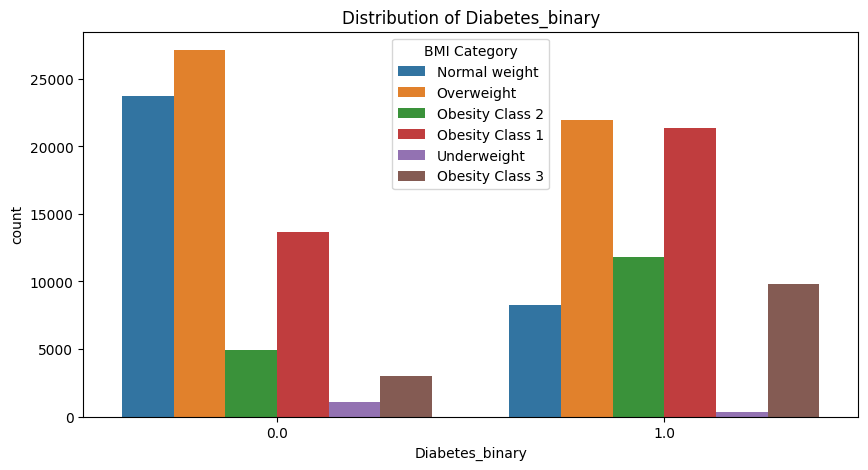

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x = combined_df['Diabetes_binary'] , hue=combined_df['BMI Category'])
plt.title('Distribution of Diabetes_binary')
plt.show()

In [ ]:
df_encoded = pd.get_dummies(df_BMI_categorical, columns = ['HighBP', 'HighChol','Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'NoDocbcCost', 'Sex', 'BMI Category'], dtype=int)

In [ ]:
df_encoded.head()

,Diabetes_binary,CholCheck,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,...,NoDocbcCost_0.0,NoDocbcCost_1.0,Sex_0.0,Sex_1.0,BMI Category_Normal weight,BMI Category_Obesity Class 1,BMI Category_Obesity Class 2,BMI Category_Obesity Class 3,BMI Category_Overweight,BMI Category_Underweight
235588,0.0,1.0,1.0,1.0,0.0,0.0,1.0,13.0,6.0,3.0,...,1,0,1,0,1,0,0,0,0,0
176390,0.0,1.0,1.0,1.0,0.0,0.0,0.0,8.0,4.0,8.0,...,1,0,1,0,0,0,0,0,1,0
9475,0.0,1.0,1.0,2.0,2.0,0.0,0.0,6.0,6.0,8.0,...,1,0,0,1,0,0,0,0,1,0
240549,0.0,1.0,1.0,3.0,5.0,5.0,1.0,5.0,5.0,1.0,...,0,1,1,0,0,0,1,0,0,0
22631,0.0,1.0,1.0,2.0,0.0,5.0,0.0,11.0,6.0,8.0,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
def magnify():
    return [dict(selector="th", props=[("font-size", "7pt")]),
            dict(selector="td", props=[('padding', "0em 0em")]),
            dict(selector="th:hover", props=[("font-size", "15pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '220px'), ('font-size', '15pt')])
]

In [ ]:
corr = features.corr()



corr.style.background_gradient(cmap='YlOrRd', axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '90px', 'font-size': '12pt'})\
    .set_caption("Hover to magify")\
    .set_table_styles(magnify())


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI Category
HighBP,1.000,0.477,0.123,0.277,0.107,0.153,0.251,-0.168,-0.046,-0.068,-0.047,0.053,0.018,0.374,0.060,0.203,0.278,0.058,0.384,-0.153,-0.208,0.292
HighChol,0.477,1.000,0.111,0.179,0.113,0.121,0.223,-0.130,-0.053,-0.058,-0.041,0.045,0.028,0.308,0.078,0.180,0.216,0.034,0.306,-0.110,-0.151,0.195
CholCheck,0.123,0.111,1.000,0.056,-0.006,0.028,0.049,-0.017,0.018,0.001,-0.037,0.125,-0.050,0.072,-0.003,0.045,0.060,-0.026,0.107,-0.000,-0.002,0.059
BMI,0.277,0.179,0.056,1.000,0.028,0.027,0.068,-0.179,-0.089,-0.056,-0.048,-0.000,0.054,0.288,0.110,0.163,0.252,-0.003,0.001,-0.109,-0.130,0.928
Smoker,0.107,0.113,-0.006,0.028,1.000,0.060,0.127,-0.088,-0.069,-0.023,0.084,-0.019,0.039,0.166,0.088,0.120,0.128,0.102,0.127,-0.158,-0.130,0.032
Stroke,0.153,0.121,0.028,0.027,0.060,1.000,0.217,-0.087,-0.009,-0.039,-0.027,0.013,0.034,0.186,0.073,0.161,0.192,0.006,0.135,-0.074,-0.133,0.031
HeartDiseaseorAttack,0.251,0.223,0.049,0.068,0.127,0.217,1.000,-0.113,-0.018,-0.033,-0.040,0.028,0.026,0.279,0.066,0.204,0.238,0.099,0.243,-0.102,-0.147,0.076
PhysActivity,-0.168,-0.130,-0.017,-0.179,-0.088,-0.087,-0.113,1.000,0.125,0.145,0.022,0.019,-0.055,-0.295,-0.132,-0.255,-0.294,0.047,-0.135,0.201,0.222,-0.179
Fruits,-0.046,-0.053,0.018,-0.089,-0.069,-0.009,-0.018,0.125,1.000,0.231,-0.029,0.026,-0.035,-0.093,-0.063,-0.045,-0.045,-0.079,0.055,0.091,0.062,-0.091
Veggies,-0.068,-0.058,0.001,-0.056,-0.023,-0.039,-0.033,0.145,0.231,1.000,0.022,0.027,-0.034,-0.117,-0.048,-0.065,-0.080,-0.051,-0.020,0.144,0.150,-0.058


Correlation seen between:

1. (PhysHlth, GenHlth) which seems reasonable to have
2.  (Education, Income)
3. (DiffWalk, GenHlth)
4. (DiffWalk, PhysHlth)
5. a small amount for (PhysHlth, MentHlth)


Remove - PhysHlth & MentHlth - reasoning : BMI, & GenHlth can provide us information
1. Remove - DiffWalk since - it is higly correated to PhysHlth - expected
2. Other variables with high VIFs - CholCheck, AnyHealthCare - fairly reasonavle to exclude them - HighChol should be enough - when it was checked isn't as important,
3. Education & income seem to be correlated - which again make sense - exclude one of them - education

In [ ]:
!apt-get -qq install -y mca & pip install mca

  Preparing metadata (setup.py) ... done
E: Unable to locate package mca
  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6009 sha256=e697ae4783555cd2f117200898398535133037b6829c42e8b84d86af10dff822
  Stored in directory: /root/.cache/pip/wheels/41/3c/28/32383be9777008d3318b6e787b89273ca4a6c6c915ce9bd1f3
Successfully built mca


In [ ]:
import mca

print(categorical_cols.columns())
mca1 = mca.MCA(combined_df, cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'], benzecri=False)
print("Factor scores for each row ")
print(print(mca1.fs_r(N=5)))
print("contribution from each row to the components")
print(mca1.cont_r(N=5))
print(" Eigen values :",mca1.L," Total Accumulated variance:", mca1.L.sum())

TypeError: 'Index' object is not callable

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns

vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

In [ ]:
print(vif_data)

                 feature        VIF
0                 HighBP   2.931136
1               HighChol   2.363499
2              CholCheck  28.461534
3                    BMI  96.725721
4                 Smoker   1.948545
5                 Stroke   1.153987
6   HeartDiseaseorAttack   1.375156
7           PhysActivity   4.200557
8                 Fruits   2.833250
9                Veggies   5.505023
10     HvyAlcoholConsump   1.071181
11         AnyHealthcare  23.551800
12           NoDocbcCost   1.208667
13               GenHlth  12.507545
14              MentHlth   1.533664
15              PhysHlth   2.134063
16              DiffWalk   2.034302
17                   Sex   2.009201
18                   Age  10.768333
19             Education  29.471980
20                Income  11.927685
21          BMI Category  31.230533


In [ ]:
features = features.drop(columns=['CholCheck', 'AnyHealthcare', 'PhysHlth', 'MentHlth', 'DiffWalk', 'Education', 'BMI'])
features.head()

,HighBP,HighChol,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,NoDocbcCost,GenHlth,Sex,Age,Income,BMI Category
235588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,13.0,3.0,1
176390,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,8.0,8.0,2
9475,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,6.0,8.0,2
240549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,5.0,1.0,4
22631,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,11.0,8.0,2


In [ ]:
corr = features.corr()

corr.style.background_gradient(cmap='YlOrRd', axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '90px', 'font-size': '12pt'})\
    .set_caption("Hover to magify")\
    .set_table_styles(magnify())

,HighBP,HighChol,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,NoDocbcCost,GenHlth,Sex,Age,Income,BMI Category
HighBP,1.000,0.477,0.107,0.153,0.251,-0.168,-0.046,-0.068,-0.047,0.018,0.374,0.058,0.384,-0.208,0.292
HighChol,0.477,1.000,0.113,0.121,0.223,-0.130,-0.053,-0.058,-0.041,0.028,0.308,0.034,0.306,-0.151,0.195
Smoker,0.107,0.113,1.000,0.060,0.127,-0.088,-0.069,-0.023,0.084,0.039,0.166,0.102,0.127,-0.130,0.032
Stroke,0.153,0.121,0.060,1.000,0.217,-0.087,-0.009,-0.039,-0.027,0.034,0.186,0.006,0.135,-0.133,0.031
HeartDiseaseorAttack,0.251,0.223,0.127,0.217,1.000,-0.113,-0.018,-0.033,-0.040,0.026,0.279,0.099,0.243,-0.147,0.076
PhysActivity,-0.168,-0.130,-0.088,-0.087,-0.113,1.000,0.125,0.145,0.022,-0.055,-0.295,0.047,-0.135,0.222,-0.179
Fruits,-0.046,-0.053,-0.069,-0.009,-0.018,0.125,1.000,0.231,-0.029,-0.035,-0.093,-0.079,0.055,0.062,-0.091
Veggies,-0.068,-0.058,-0.023,-0.039,-0.033,0.145,0.231,1.000,0.022,-0.034,-0.117,-0.051,-0.020,0.150,-0.058
HvyAlcoholConsump,-0.047,-0.041,0.084,-0.027,-0.040,0.022,-0.029,0.022,1.000,0.004,-0.054,0.007,-0.068,0.062,-0.050
NoDocbcCost,0.018,0.028,0.039,0.034,0.026,-0.055,-0.035,-0.034,0.004,1.000,0.151,-0.048,-0.117,-0.189,0.054


In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

In [ ]:
print(vif_data)

                 feature       VIF
0                 HighBP  2.906485
1               HighChol  2.355422
2                 Smoker  1.926529
3                 Stroke  1.144146
4   HeartDiseaseorAttack  1.356799
5           PhysActivity  3.724892
6                 Fruits  2.793816
7                Veggies  5.254319
8      HvyAlcoholConsump  1.068467
9            NoDocbcCost  1.148898
10               GenHlth  8.101593
11                   Sex  1.983869
12                   Age  8.502203
13                Income  7.266447
14          BMI Category  5.480747


# **Check for outliers**

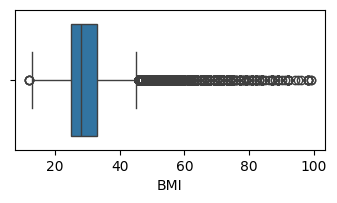

In [ ]:
plt.figure(figsize=(10,10))
for i,col in enumerate(['BMI']):
  plt.subplot(4,2,i+1)
  sns.boxplot(x=col, data=combined_df)

plt.subplots_adjust(
  wspace=0.5,
  hspace=0.5
)
plt.show()

In [ ]:
combined_df = combined_df.drop(columns=['CholCheck', 'AnyHealthcare', 'PhysHlth', 'MentHlth', 'DiffWalk', 'Education'])

In [ ]:
combined_df.head()

# One Hot Encoding

In [ ]:
binary_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthCare', 'NoDocbcCost', 'DiffWalk', 'Sex']
df_encoded = pd.get_dummies(combined_df, columns = ['HighBP', 'HighChol','Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'NoDocbcCost', 'Sex', 'BMI Category'], dtype=int)

In [ ]:
df_encoded.describe()

,Diabetes_binary,CholCheck,BMI,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,...,NoDocbcCost_0.0,NoDocbcCost_1.0,Sex_0.0,Sex_1.0,BMI Category_Normal weight,BMI Category_Obesity Class 1,BMI Category_Obesity Class 2,BMI Category_Obesity Class 3,BMI Category_Overweight,BMI Category_Underweight
count,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,...,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000,147090.000000
mean,0.500000,0.969386,29.764879,0.956625,2.734652,3.918948,5.188041,0.226038,8.222211,4.997294,...,0.917608,0.082392,0.533299,0.466701,0.217248,0.238072,0.113910,0.087321,0.333435,0.010014
std,0.500002,0.172270,7.145347,0.203700,1.108790,8.137695,9.617442,0.418266,3.074834,1.005931,...,0.274962,0.274962,0.498892,0.498892,0.412374,0.425905,0.317703,0.282305,0.471442,0.099569
min,0.000000,0.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,25.000000,1.000000,2.000000,0.000000,0.000000,0.000000,6.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,28.000000,1.000000,3.000000,0.000000,0.000000,0.000000,9.000000,5.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,33.000000,1.000000,3.000000,3.000000,5.000000,0.000000,11.000000,6.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,99.000000,1.000000,5.000000,30.000000,30.000000,1.000000,13.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_encoded = df_encoded.drop(columns=['CholCheck', 'AnyHealthcare', 'PhysHlth', 'MentHlth', 'DiffWalk', 'Education', 'BMI'])

In [ ]:
# We need to change the df variable and feature name of Diabetes
#x= df_encoded.drop('Diabetes_binary', axis=1)
x = df_encoded.drop(columns='Diabetes_binary')
y= df_encoded["Diabetes_binary"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=50)

#validation split
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.3, random_state=50)

In [ ]:
#Scaling the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter=19500)
reg.fit(x_train, y_train)

LogisticRegression(max_iter=19500)

In [ ]:
ypred = reg.predict(x_test)

In [ ]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      6547
         1.0       0.82      0.82      0.82      6692

    accuracy                           0.81     13239
   macro avg       0.81      0.81      0.81     13239
weighted avg       0.81      0.81      0.81     13239



In [ ]:
from sklearn.metrics import  f1_score


f1_score = f1_score(y_test, ypred)
print(f1_score)

0.8159426780116434


[[5307 1240]
 [1226 5466]]


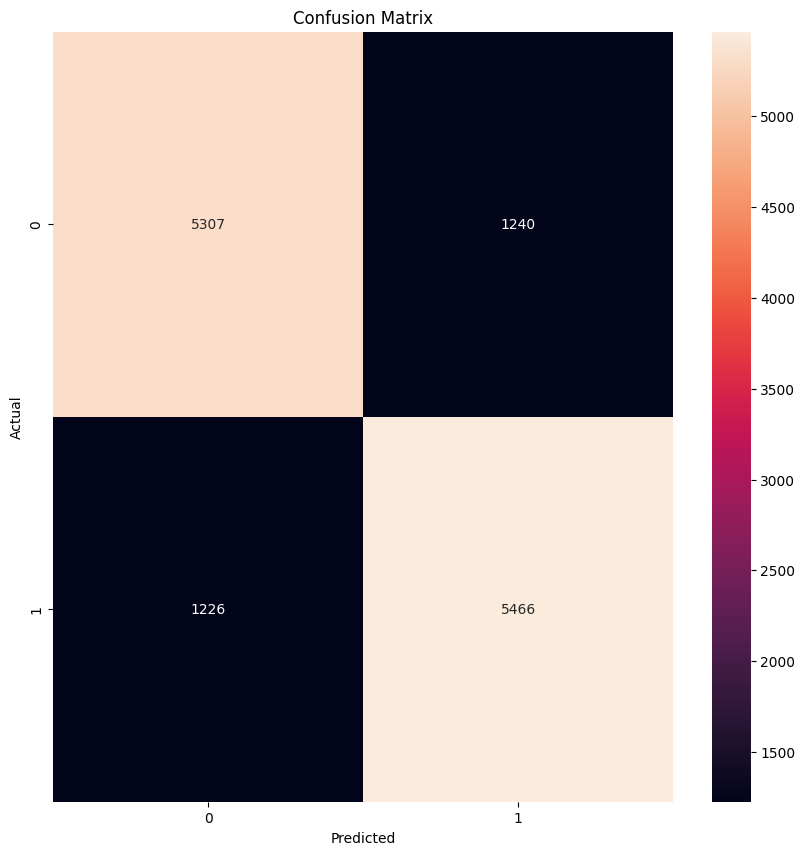

In [ ]:
cm = confusion_matrix(y_test, ypred)
print(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

              Predicted Healthy  Predicted Diabetes
Not Diabetic               5084                1463
Diabetic                   1292                5400
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79      6547
         1.0       0.79      0.81      0.80      6692

    accuracy                           0.79     13239
   macro avg       0.79      0.79      0.79     13239
weighted avg       0.79      0.79      0.79     13239

F1 score : 0.7919027116851727


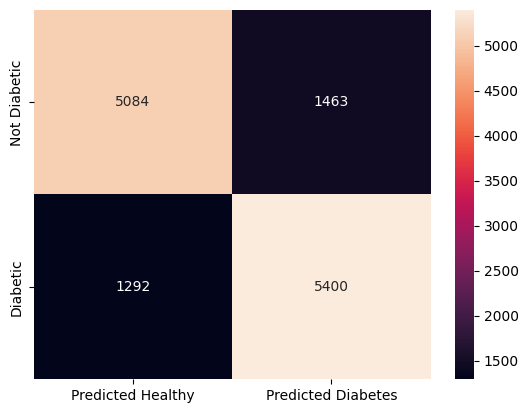

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

cm = np.array(confusion_matrix(y_test, y_predict, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=['Not Diabetic', 'Diabetic'], columns=['Predicted Healthy', 'Predicted Diabetes'])

print(confusion)
sns.heatmap(confusion,annot=True,fmt='g')
print(classification_report(y_test, y_predict))
f1_score = f1_score(y_test, y_predict, average='micro')
print(f"F1 score : {f1_score}")

In [ ]:
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Others
import json
import gensim
from sklearn.decomposition import TruncatedSVD

In [ ]:
# Classifiers
names = [
    #"Logistic Regression",
    #"KNN Classifier",
    #"Decision Tree",
    "Linear SVM",
    #"Random Forest",
    #"SGD Classifier",
    #"Ridge Classifier",
    #"XGBoost",
    #"AdaBoost",
]

models = [
    #LogisticRegression(max_iter = 1000),
    #KNeighborsClassifier(n_neighbors = 149, n_jobs = -1),
    #DecisionTreeClassifier(),
    svm.SVC(kernel = 'linear'),
    #RandomForestClassifier(n_estimators = 100),
    #SGDClassifier(loss = 'hinge'),
    #RidgeClassifier(),
    #XGBClassifier(),
    #AdaBoostClassifier()
]

In [ ]:
def score(X_train, y_train, X_val, y_val, names = names, models = models):
    score_df, score_train, score_val = pd.DataFrame(), [], []
    #x = time.time()
    for model in models:
        model.fit(X_train, y_train)
        y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_val.append(accuracy_score(y_val, y_val_pred))

    score_df["Classifier"], score_df["Training accuracy"], score_df["Validation accuracy"] = names, score_train, score_val
    score_df.sort_values(by = 'Validation accuracy', ascending = False, inplace = True)
    return score_df

In [ ]:
score(x_train, y_train, x_val, y_val, names = names, models = models)

,Classifier,Training accuracy,Validation accuracy
0,Linear SVM,0.813768,0.514925


In [ ]:
y_test_predict = models[0].predict(x_test)
score_test = accuracy_score(y_test, y_test_predict)
print(metrics.f1_score(y_test, y_test_predict, average='micro'))
print(pd.Series({"Test accuracy": score_test}).to_string())
print(" ")

0.8135055517788352
Test accuracy    0.813506
 


In [ ]:
y_test_predict = models[1].predict(x_test)
score_test = accuracy_score(y_test, y_test_predict)
print(metrics.f1_score(y_test, y_test_predict, average='micro'))
print(pd.Series({"Test accuracy": score_test}).to_string())
print(" ")

In [ ]:
y_test_predict = models[3].predict(x_test)
score_test = accuracy_score(y_test, y_test_predict)
print(metrics.f1_score(y_test, y_test_predict, average='micro'))
print(pd.Series({"Test accuracy": score_test}).to_string())
print(" ")